# 전처리 과정

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as spst
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!
from statsmodels.graphics.mosaicplot import mosaic   
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')   

In [2]:
import seaborn as sns
print(sns.__version__)

0.11.0


In [3]:
pip install seaborn==0.11.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
print(sns.__version__)

0.11.0


In [5]:
path = 'customer_data_.csv'

df = pd.read_csv( path , encoding = 'CP949')
df.head()

,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,2,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80000,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,4,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80000,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,5,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60000,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,0,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110000,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,3,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120000,0,3,비방문,없음,대리점,947000,SUV,중


In [6]:
df.columns

Index(['clust', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay',
       '갱신', '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

In [7]:
len(df.columns)

21

In [8]:
df.isna().sum()

clust                      0
AGE                        0
등록(계/피)                    0
고용상태                       0
성별                         0
Willingness to pay/Stay    0
갱신                         0
상품타입                       0
교육수준                       0
소득                         0
지역                         0
결혼여부                       0
월 납입액                      0
VOC                        0
타 상품 보유 현황                 0
온라인방문빈도                    0
갱신인센티브                     0
판매채널                       0
총지불금액                      0
자동차                        0
거주지사이즈                     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   clust                    12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

# 대분류로 숫자형과 object형 분류

In [10]:
df_int = df.select_dtypes(include = 'int64' )

In [11]:
df_object = df.select_dtypes(include = 'object' )  

In [12]:
df_int

,clust,AGE,성별,갱신,소득,월 납입액,VOC,총지불금액
0,2,3,1,0,0,80000,0,631000
1,4,1,0,0,102887400,80000,1,54000
2,5,2,0,0,22159500,60000,0,362000
3,0,5,1,0,51562500,110000,0,1264000
4,3,4,0,0,26820200,120000,0,947000
...,...,...,...,...,...,...,...,...
11995,0,1,1,0,86451000,70000,0,245000
11996,0,3,0,1,25962000,80000,0,468000
11997,2,3,1,0,0,90000,3,977000
11998,4,4,1,0,26366000,100000,0,854000


# 숫자형이지만 비연속적으로 추정되는 컬럼 여부로 재분류

In [13]:
dr1 = ['소득','총지불금액' ] 
df_int1 = df_int.drop( dr1 , axis = 1)

In [14]:
df_int2 = df_int[dr1]

# 비연속적인 숫자형 컬럼

In [15]:
df_int1

,clust,AGE,성별,갱신,월 납입액,VOC
0,2,3,1,0,80000,0
1,4,1,0,0,80000,1
2,5,2,0,0,60000,0
3,0,5,1,0,110000,0
4,3,4,0,0,120000,0
...,...,...,...,...,...,...
11995,0,1,1,0,70000,0
11996,0,3,0,1,80000,0
11997,2,3,1,0,90000,3
11998,4,4,1,0,100000,0


# 연속적인 컬럼

In [16]:
df_int2

,소득,총지불금액
0,0,631000
1,102887400,54000
2,22159500,362000
3,51562500,1264000
4,26820200,947000
...,...,...
11995,86451000,245000
11996,25962000,468000
11997,0,977000
11998,26366000,854000


# 비연속적인 컬럼인지 검증

In [17]:
for x in df_int1.columns:
    print(df_int[x].unique())

[2 4 5 0 3 1]
[3 1 2 5 4 6]
[1 0]
[0 1]
[ 80000  60000 110000 120000  70000  90000 130000 100000 230000 190000
 150000 170000 210000 140000 310000 180000 200000 220000 160000 240000
 270000 280000 300000 330000 260000 350000 340000 250000 320000 290000]
[0 1 3 2 4 5]


 # 확인결과 비연속적인 컬럼으로 판단됨

# 1. EDA 진행 : 숫자형이고 연속적인 컬럼

In [18]:
def eda_1_n ( var , data , bins = 50 ):
    print( data[[var]].describe().T )
    plt.figure(figsize = ( 12 , 8))
    plt.subplot( 2 , 1 , 1)
    sns.histplot( x = var , data = data , bins = bins , kde = True)
    plt.grid()

    plt.subplot( 2 , 1 , 2)
    sns.boxplot( x = var , data = data )
    plt.grid()
    plt.show()

      count         mean           std  min  25%         50%         75%  \
소득  12000.0  46417371.85  3.736221e+07  0.0  0.0  41862400.0  76641500.0   

            max  
소득  132020900.0  


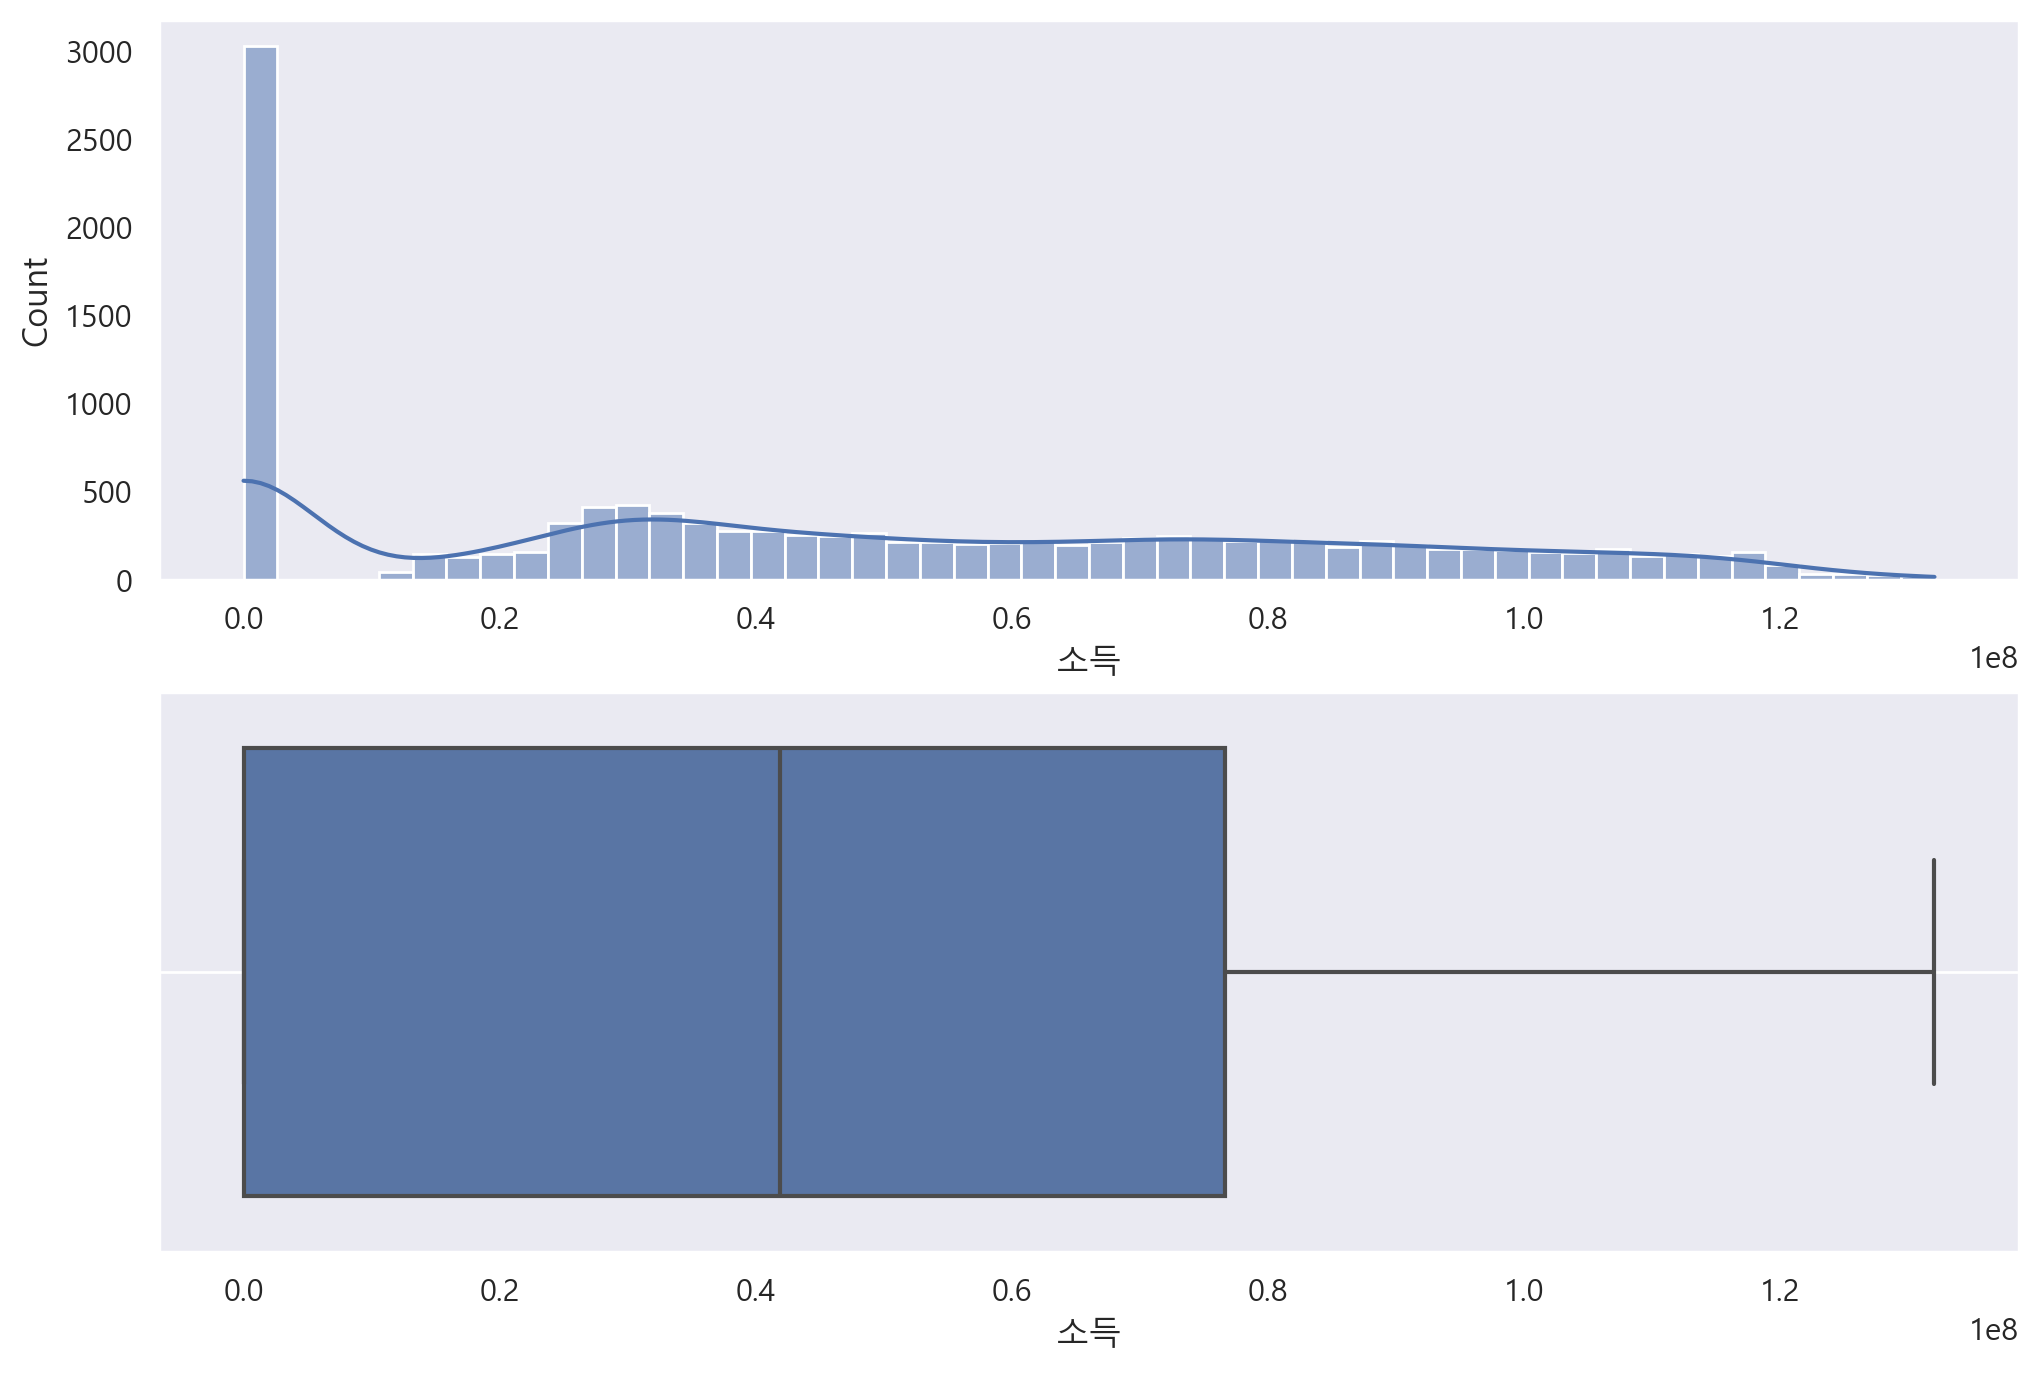

         count           mean            std  min       25%       50%  \
총지불금액  12000.0  535585.416667  358799.286205  0.0  336000.0  474000.0   

            75%        max  
총지불금액  679000.0  3573000.0  


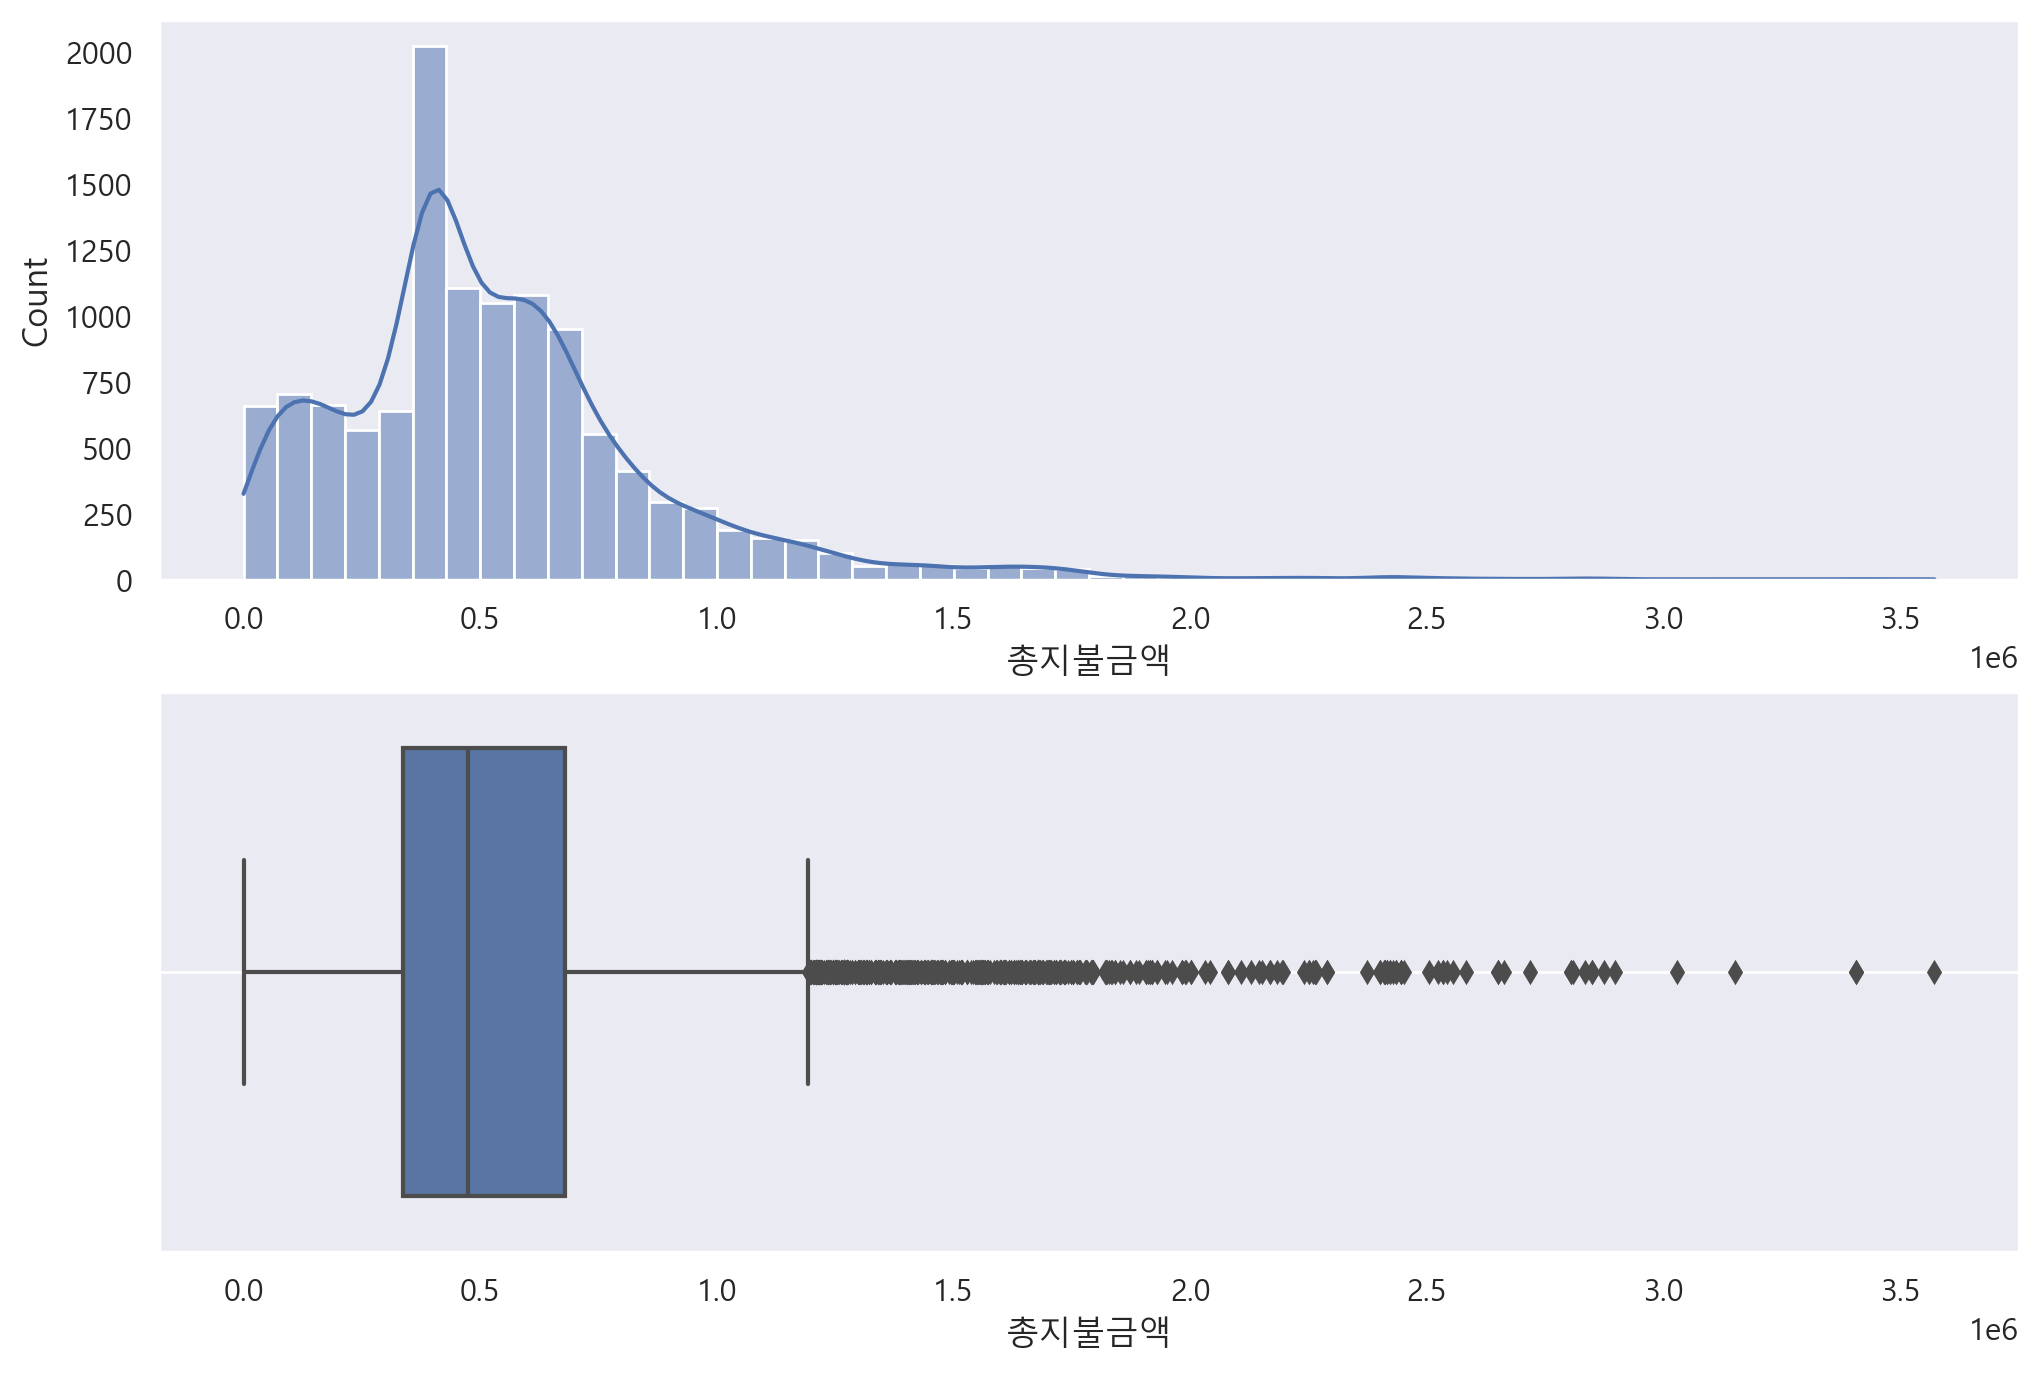

In [19]:
for i in df_int2.columns:
    eda_1_n( i , df_int2 )

In [20]:
def eda_2_nn( a , b , data ):
    sns.scatterplot( x = a , y = b , data = data)
    sns.regplot( x = a , y = b , data = data)
    sns.jointplot( x = a , y = b , data = data)
    plt.grid()
    plt.show()
    result = spst.pearsonr( data[a] , data[b] )
    print( f'상관계수 : {result[0]} , P-value : {result[1]}')

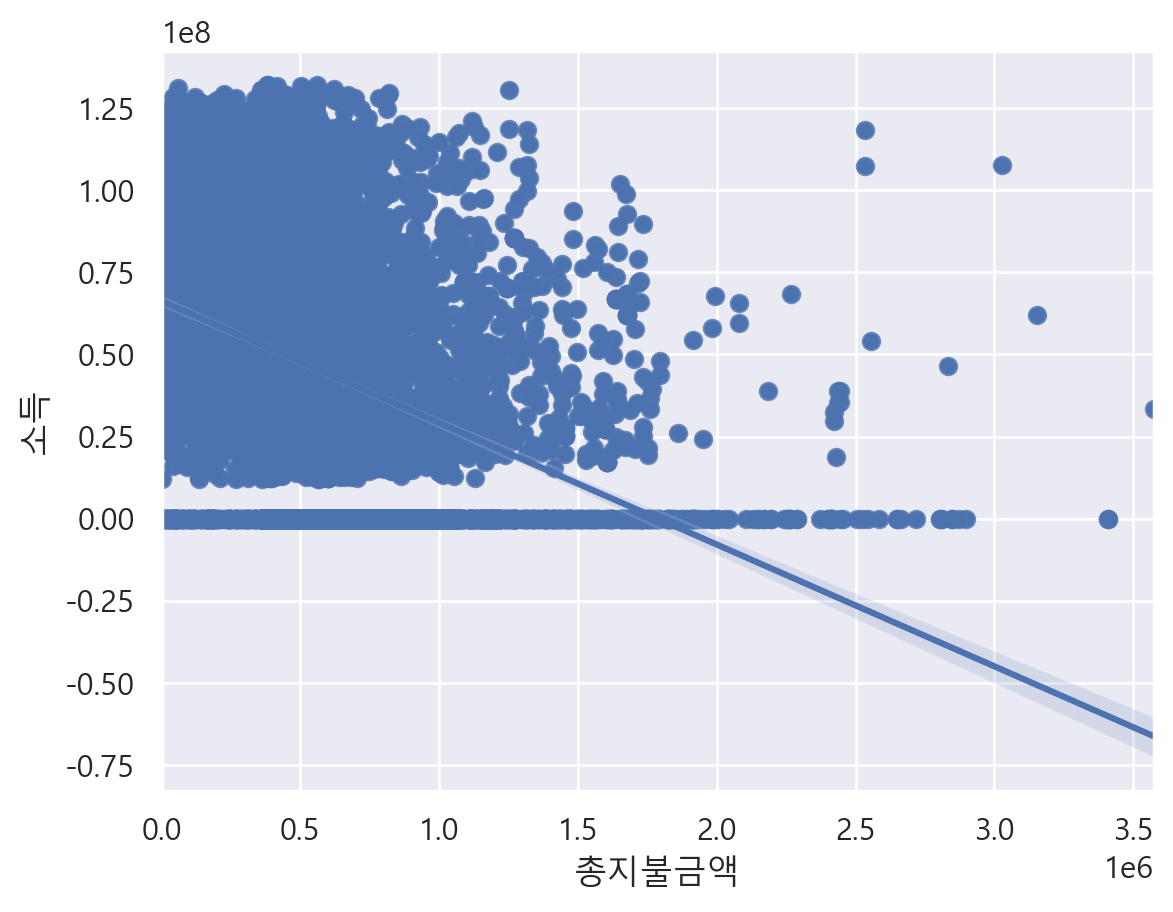

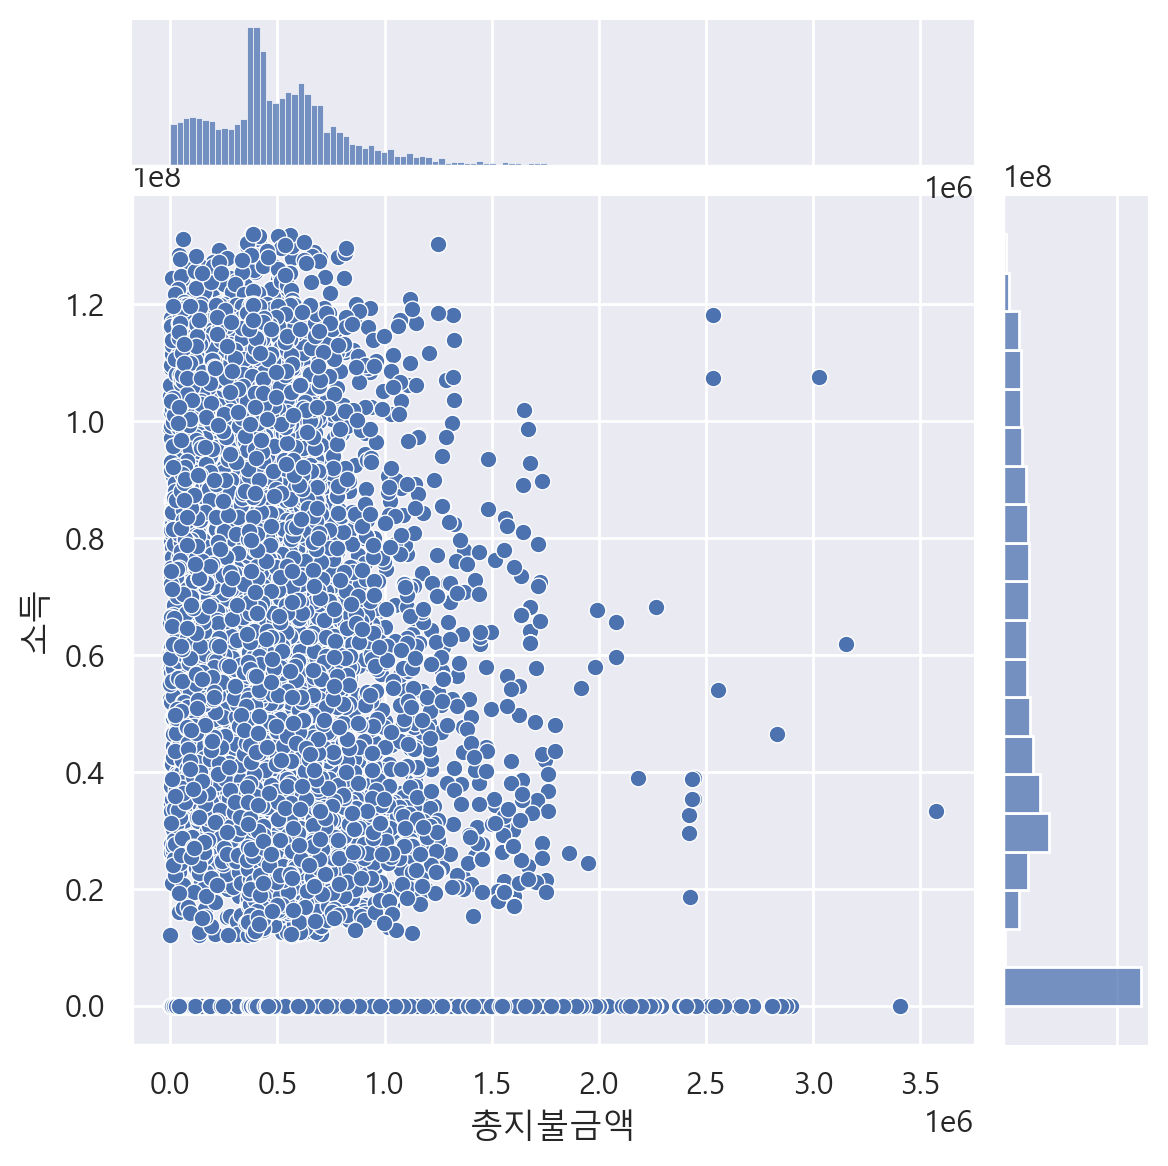

상관계수 : -0.3559084793683354 , P-value : 0.0


In [21]:
eda_2_nn( '총지불금액' , '소득' , df_int2 )

In [22]:
spst.pearsonr( df_int2['총지불금액'] , df_int['소득'])

PearsonRResult(statistic=-0.3559084793683354, pvalue=0.0)

# 1-1. EDA 진행 : 숫자형이고 비연속적인 컬럼

In [23]:
df_int1.head()

,clust,AGE,성별,갱신,월 납입액,VOC
0,2,3,1,0,80000,0
1,4,1,0,0,80000,1
2,5,2,0,0,60000,0
3,0,5,1,0,110000,0
4,3,4,0,0,120000,0


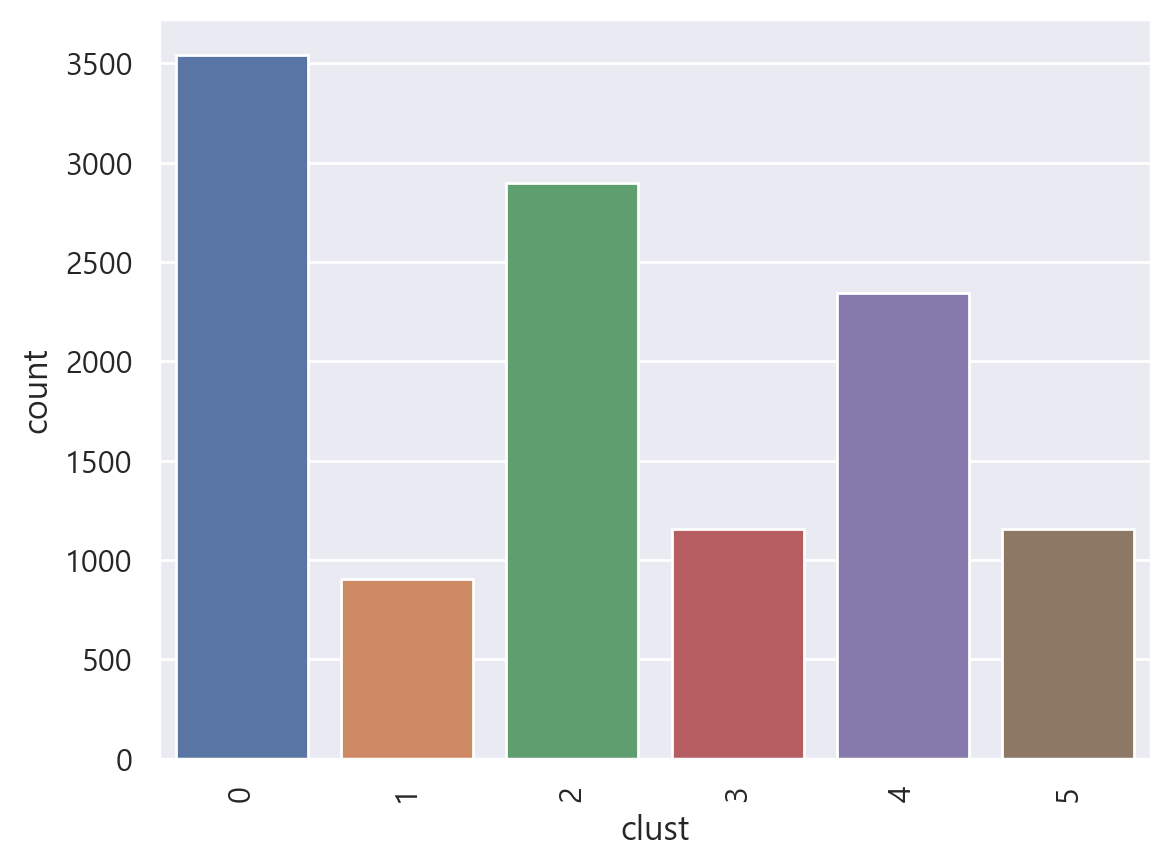

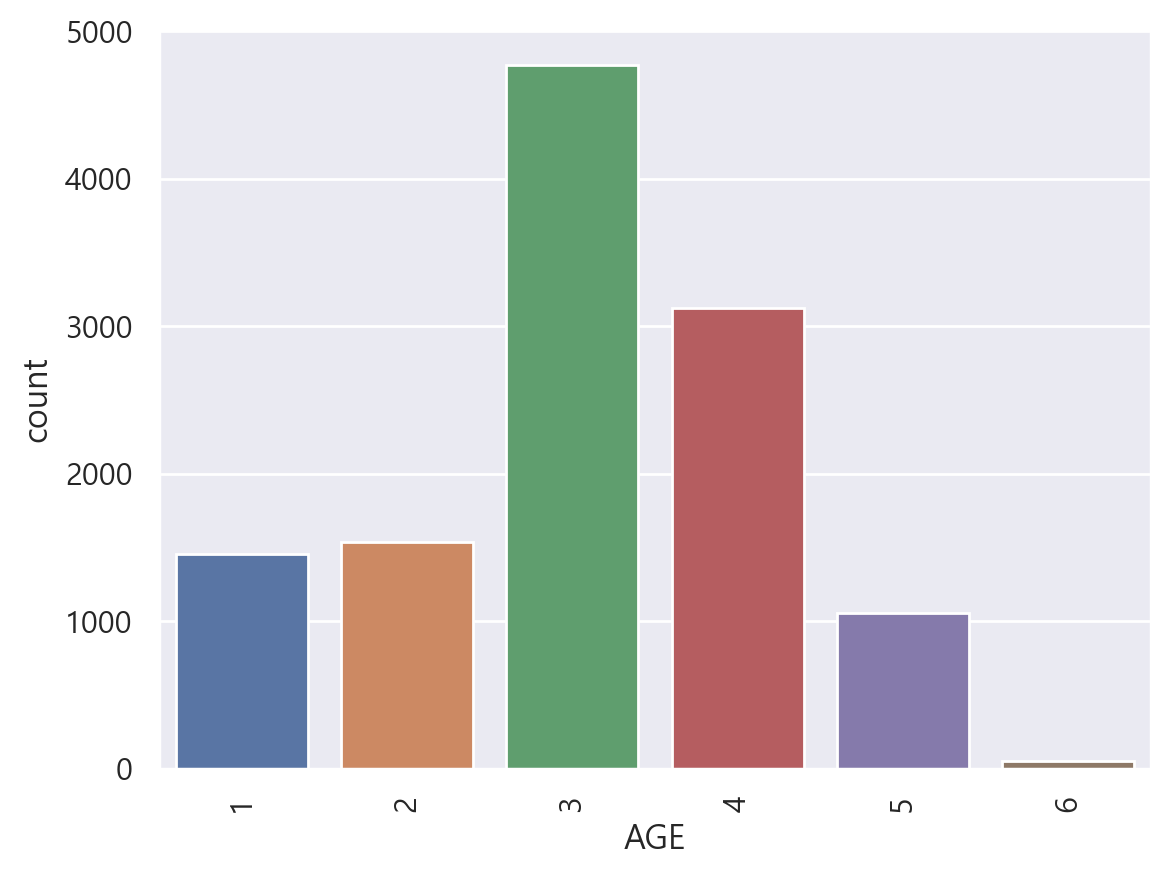

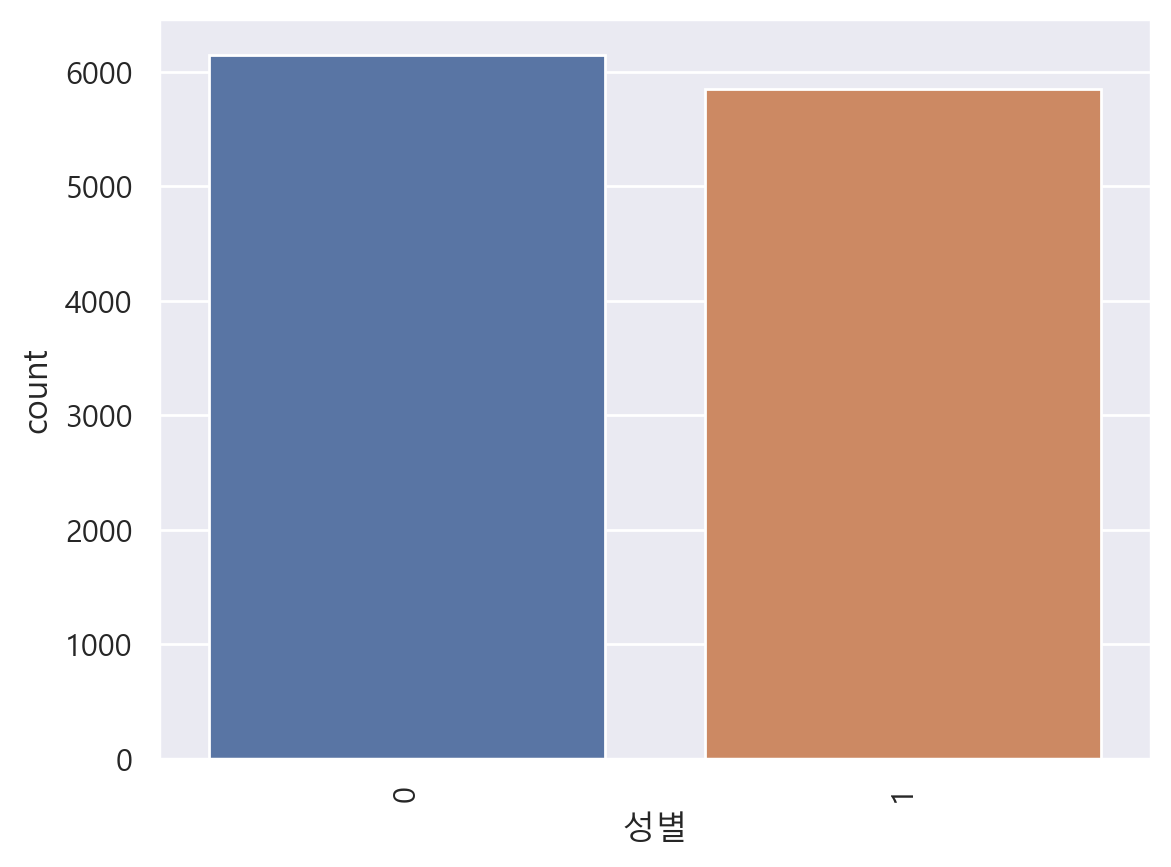

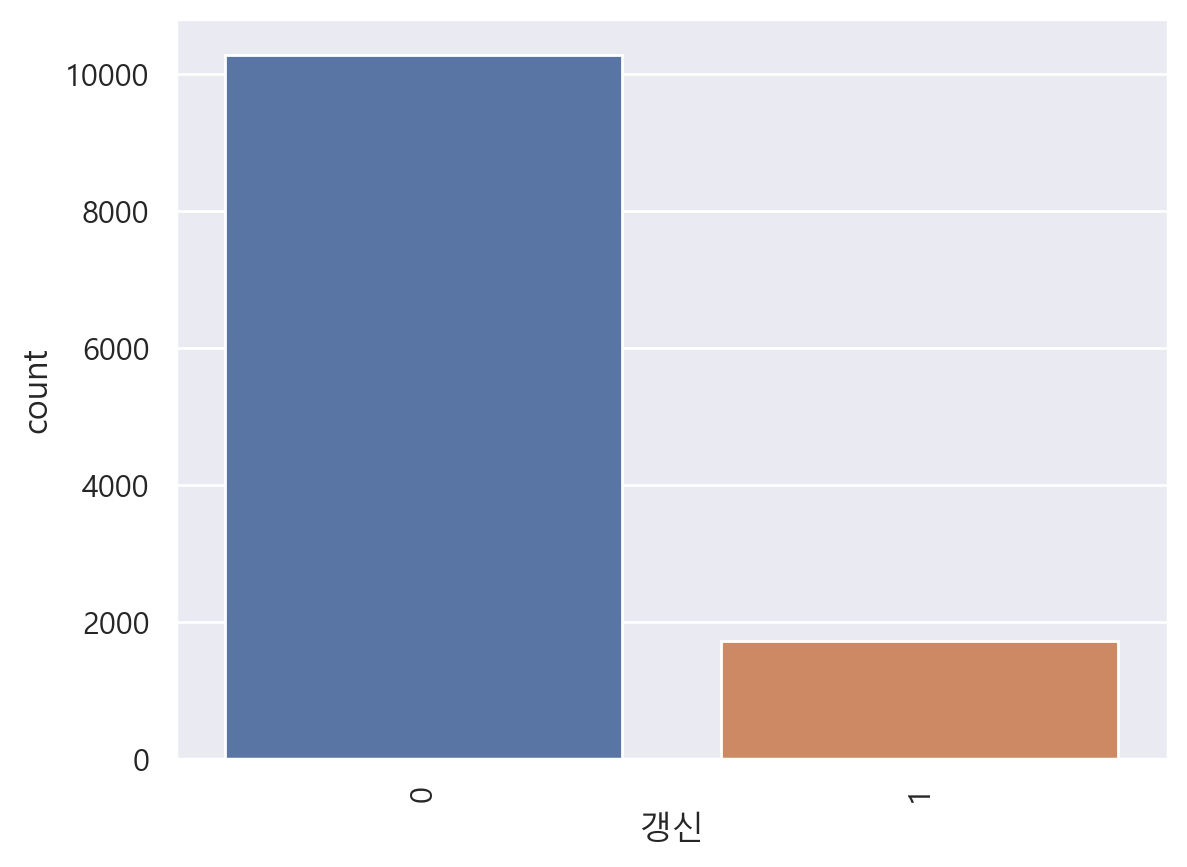

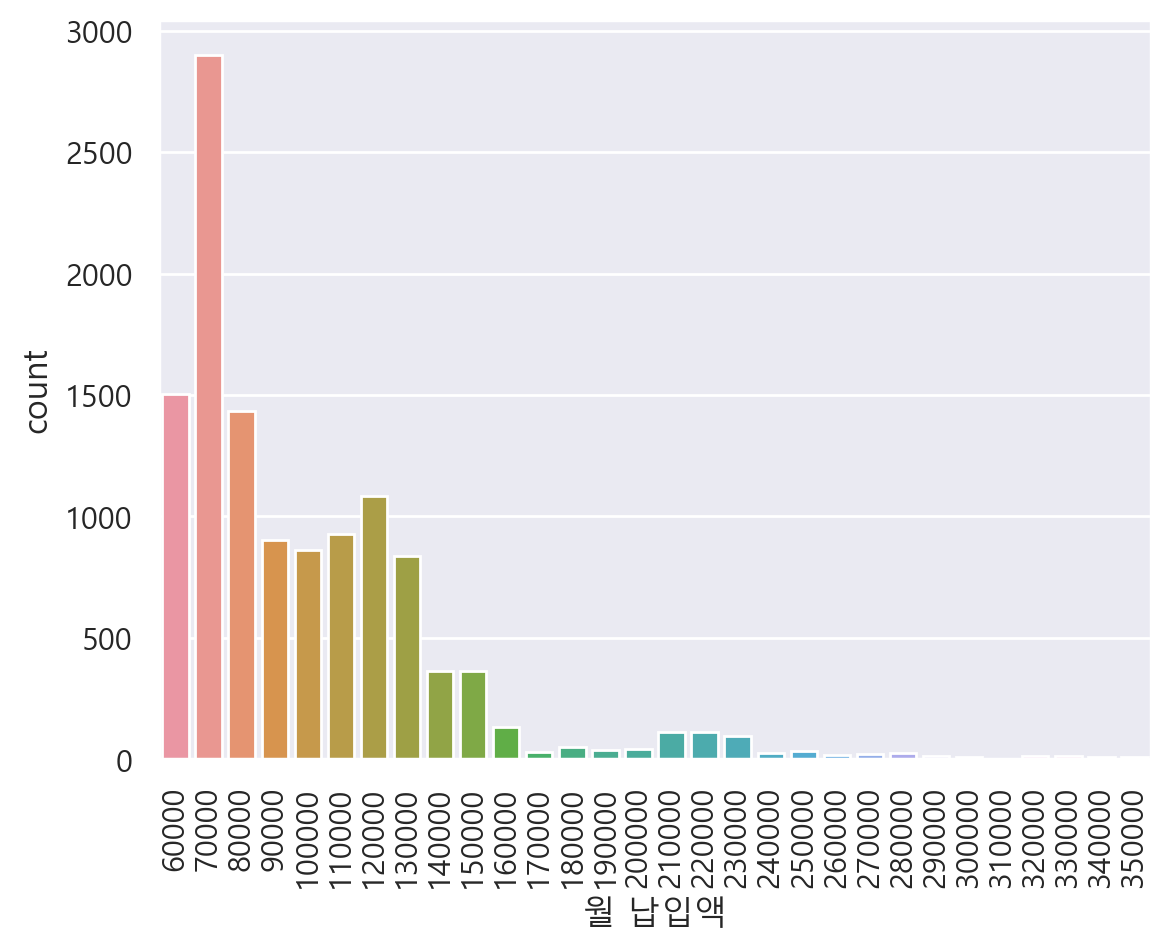

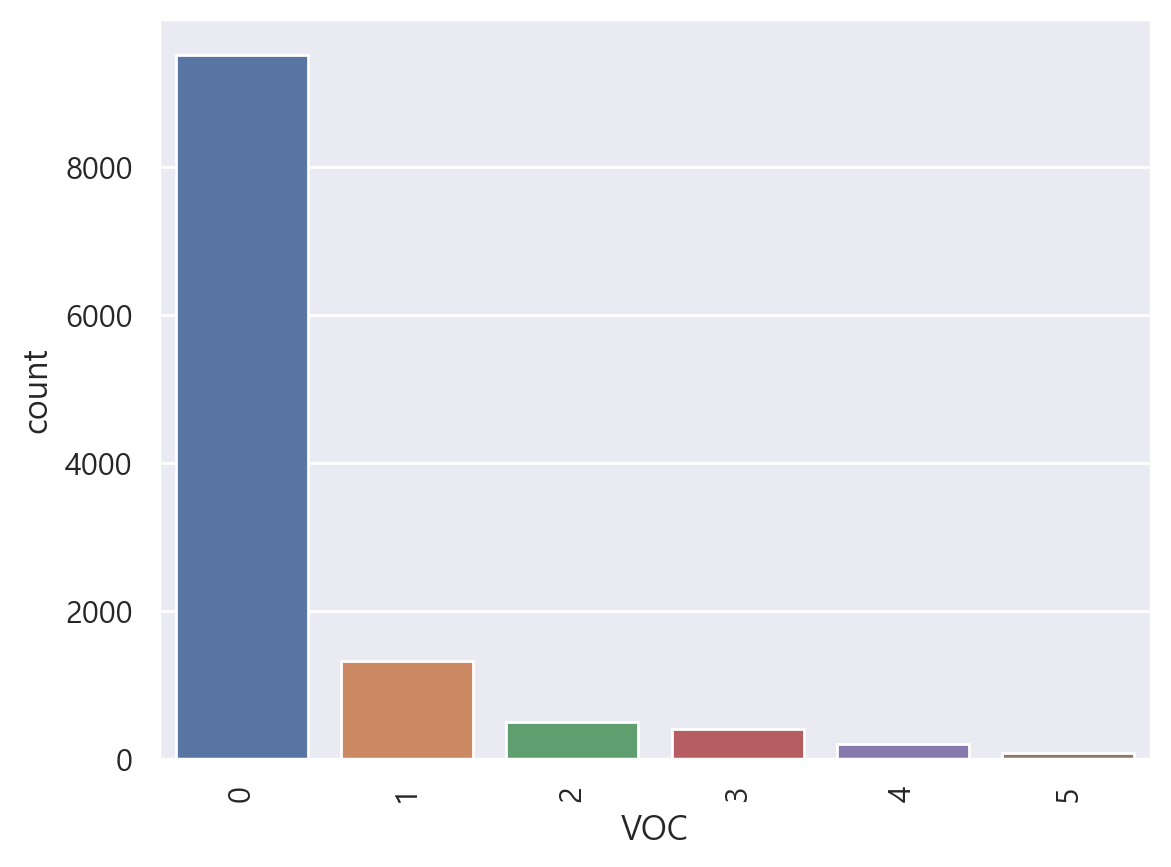

In [24]:
for c in df_int1.columns:
    sns.countplot( c , data = df_int1)
    plt.xticks( rotation = 90)
    plt.show()

## 숫자형 자료들 상관계수 분석

In [25]:
a = df_int.corr()
a

,clust,AGE,성별,갱신,소득,월 납입액,VOC,총지불금액
clust,1.000000,-0.007350,0.001143,0.071558,-0.147685,-0.117170,-0.004395,-0.031982
AGE,-0.007350,1.000000,0.027165,0.061635,-0.264138,0.222332,-0.006776,0.307408
성별,0.001143,0.027165,1.000000,0.001099,-0.017993,0.007481,-0.002514,0.076204
갱신,0.071558,0.061635,0.001099,1.000000,0.008321,0.007441,-0.010750,0.018440
소득,-0.147685,-0.264138,-0.017993,0.008321,1.000000,-0.022209,0.006883,-0.355908
월 납입액,-0.117170,0.222332,0.007481,0.007441,-0.022209,1.000000,-0.018547,0.632657
VOC,-0.004395,-0.006776,-0.002514,-0.010750,0.006883,-0.018547,1.000000,-0.015522
총지불금액,-0.031982,0.307408,0.076204,0.018440,-0.355908,0.632657,-0.015522,1.000000


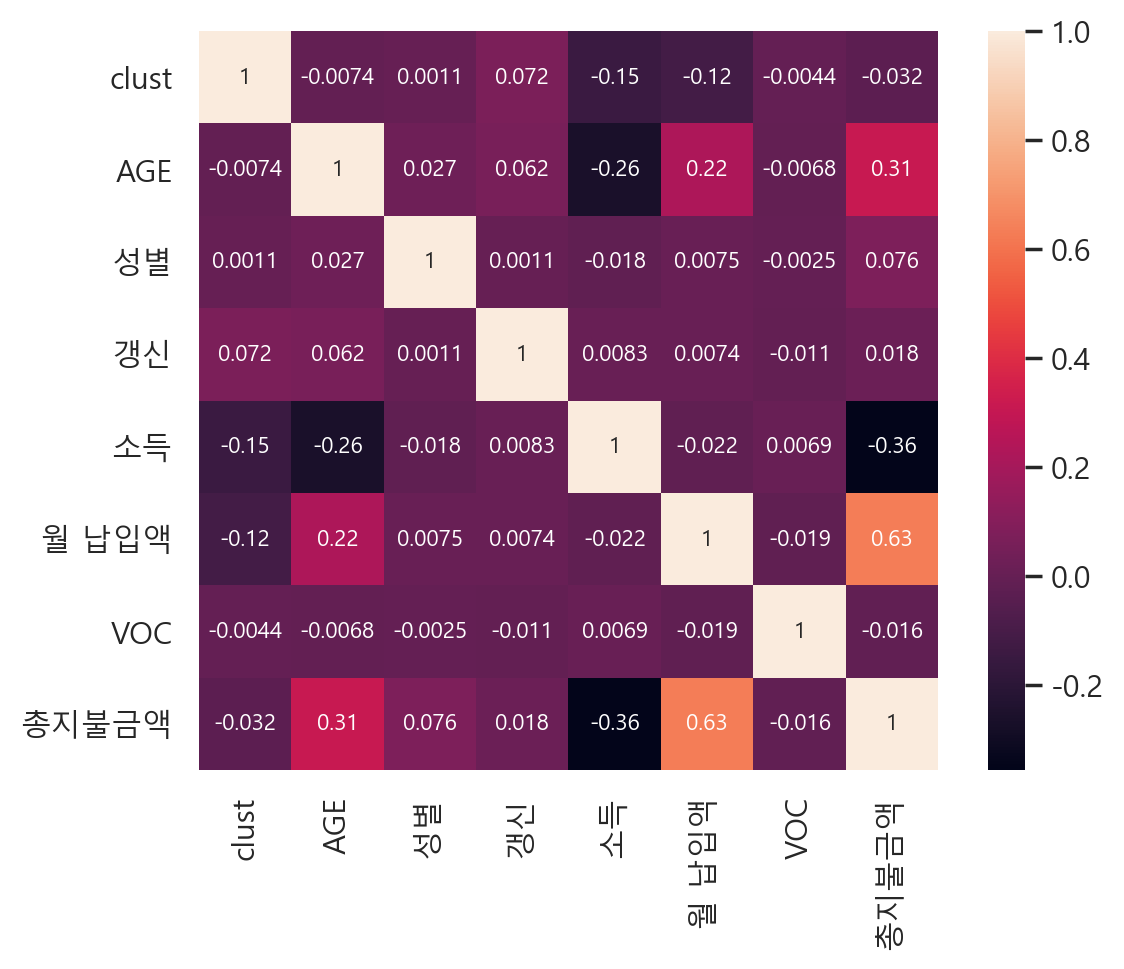

In [26]:
sns.heatmap( a , annot = True , cbar = True , square= True , annot_kws= {'size': 8} )
plt.show()

## 상관계수 분석결과
1. 강한 상관관계: 월 납입액 - 총지불금액
2. 약한 상관관계: 소득 - 총지불금액 , 소득 - clust , 소득 - Age , Age - 총지불금액 , Age - 월납입액 등으로 판단됨

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 빈 데이터프레임 만들기
vif = pd.DataFrame()

# VIF 확인 및 기록
vif['feature'] = df_int.columns
vif['vif_factor'] = [variance_inflation_factor(df_int.values, i) for i in range(df_int.shape[1])]

# VIF 기준으로 정렬
vif.sort_values(by='vif_factor', ascending=False, inplace=True)
vif.reset_index(drop=True, inplace=True)

# 확인
vif

,feature,vif_factor
0,월 납입액,11.075089
1,총지불금액,6.822640
2,AGE,6.306305
3,clust,2.188120
4,성별,1.890861
5,갱신,1.179306
6,VOC,1.167250
7,소득,0.347536


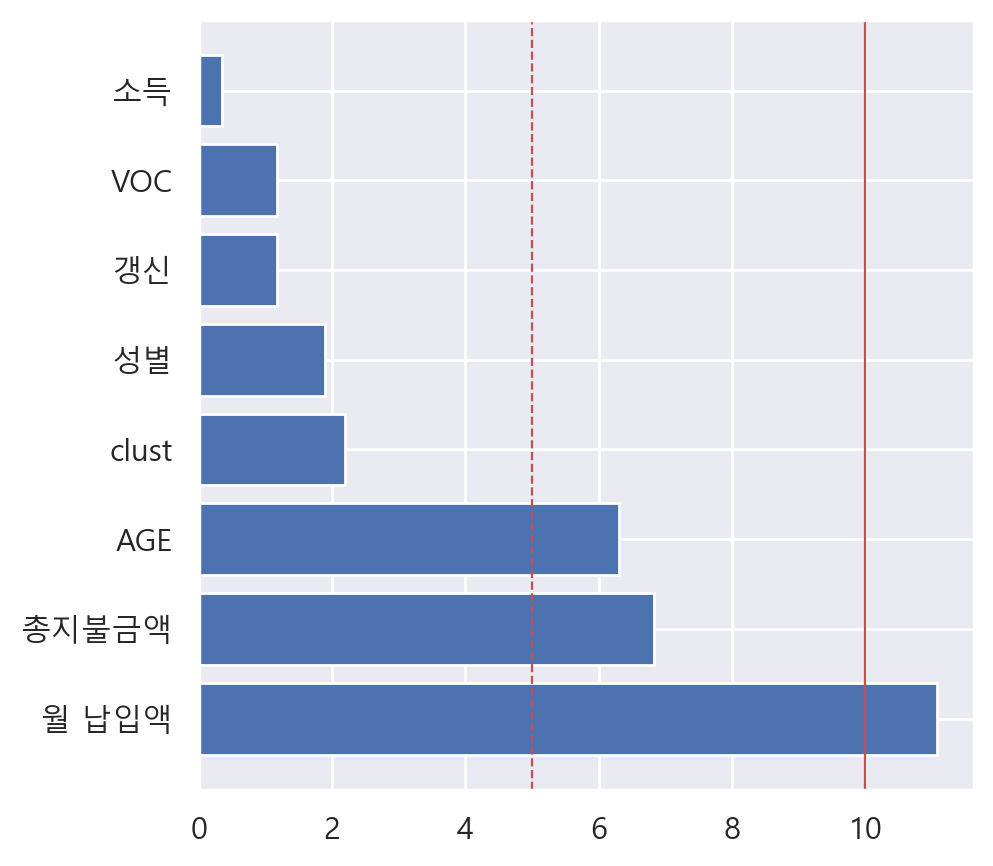

In [28]:
plt.figure(figsize=(5, 5))
plt.barh(y=vif['feature'], width=vif['vif_factor'])
plt.axvline(5, color='r', linestyle='--', linewidth=0.8)
plt.axvline(10, color='r', linestyle='-', linewidth=0.8)
plt.show()

## 다중공선성 확인결과3가지 칼럼이 강한 상관관계가 있어, 수정이 필요해 보임
1. 수정이 필요한 칼럼: 월 납입액
2. 수정을 고려해야할 칼럼: 총지불금액, Age

# 2. EDA 진행 : object형 칼럼

In [29]:
df_object.head()

,등록(계/피),고용상태,상품타입,교육수준,지역,결혼여부,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,자동차,거주지사이즈
0,피보험자,무직,기본,대학졸업,도시근교,미혼,1,자주방문,없음,자사영업,일반세단,소
1,계약자,고용,기본,고졸이하,시골,미혼,4이상,비방문,포인트,인터넷,일반세단,중
2,계약자,휴직,기본,대학졸업,도시근교,기혼,4이상,비방문,할인,자사영업,일반세단,중
3,계약자,고용,고급,고졸이하,도시근교,기혼,2,비방문,할인,자사영업,컴팩트카,대
4,계약자,고용,기본,석사,도시근교,기혼,3,비방문,없음,대리점,SUV,중


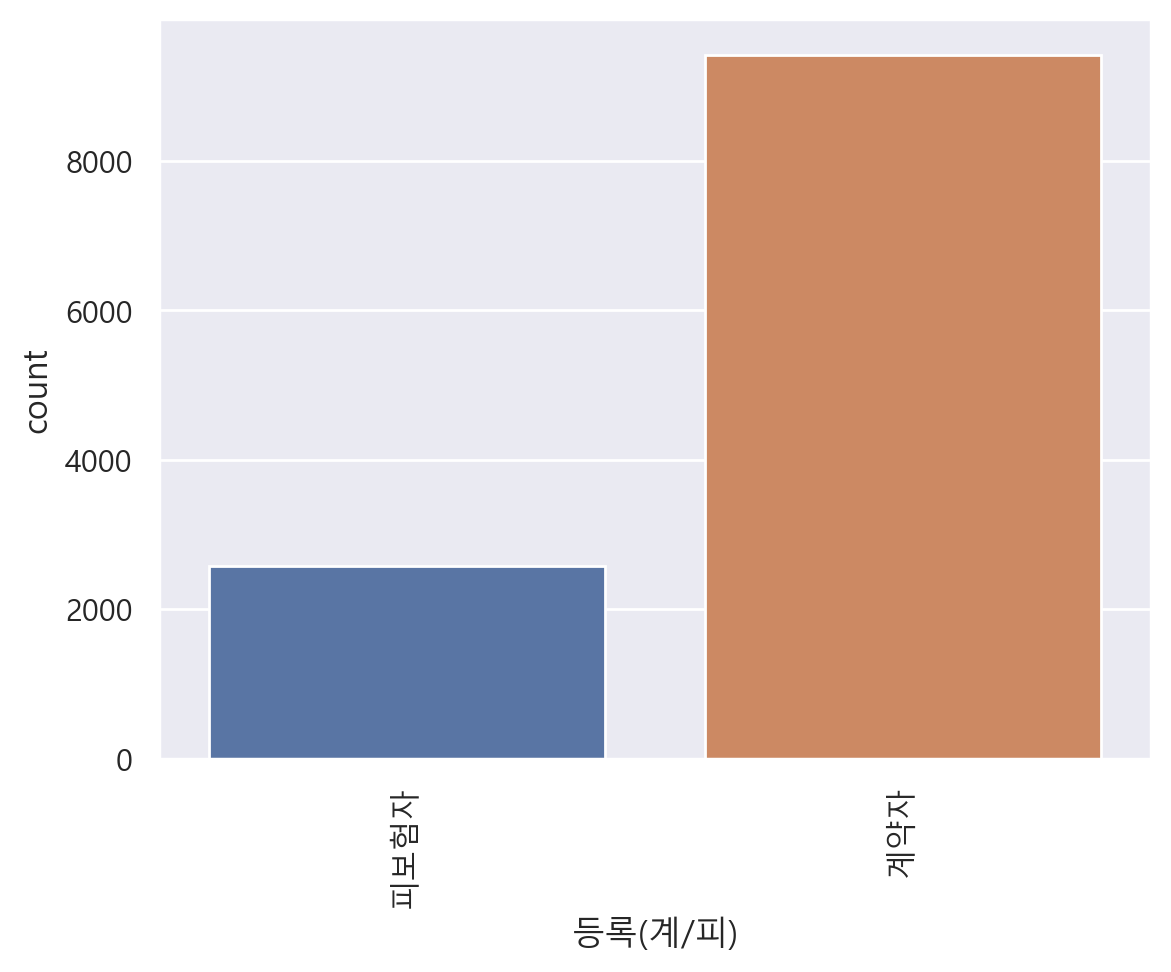

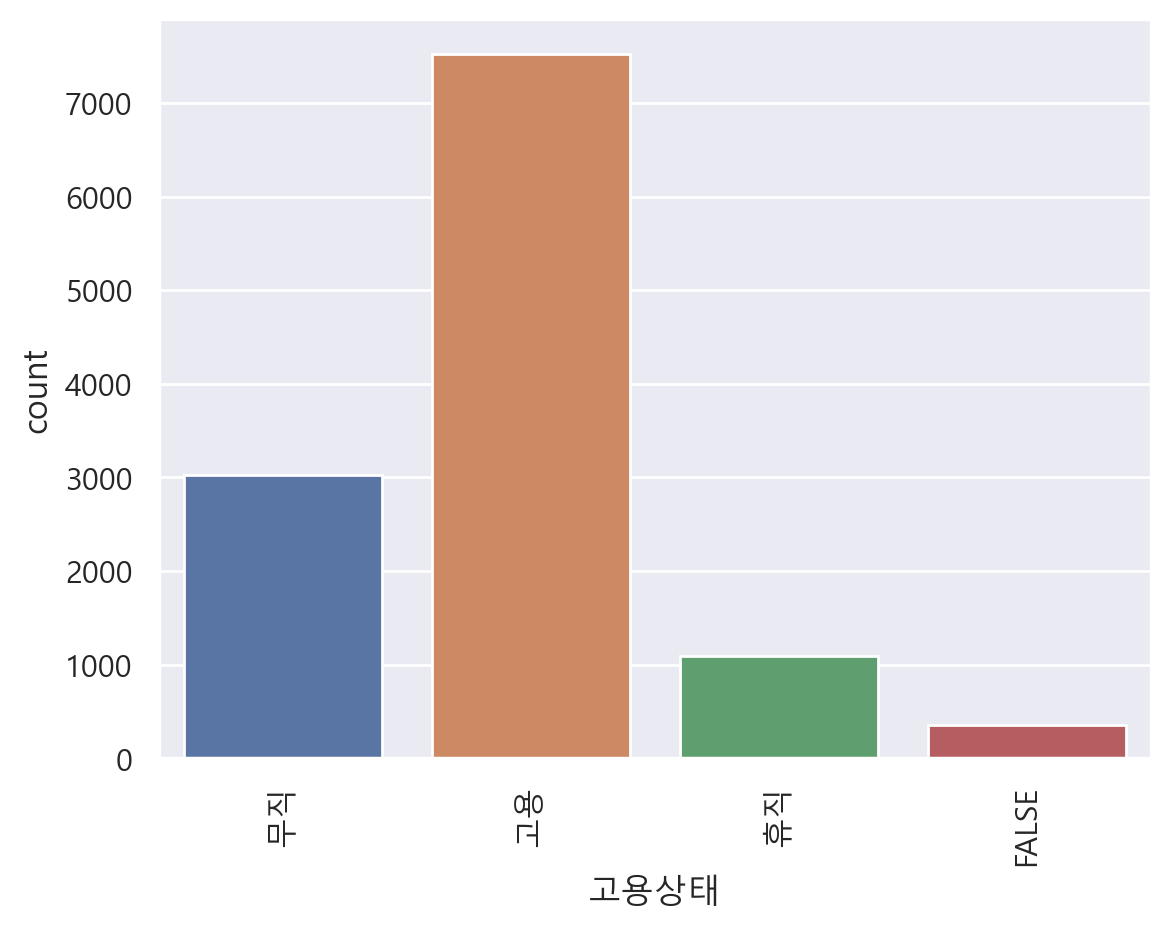

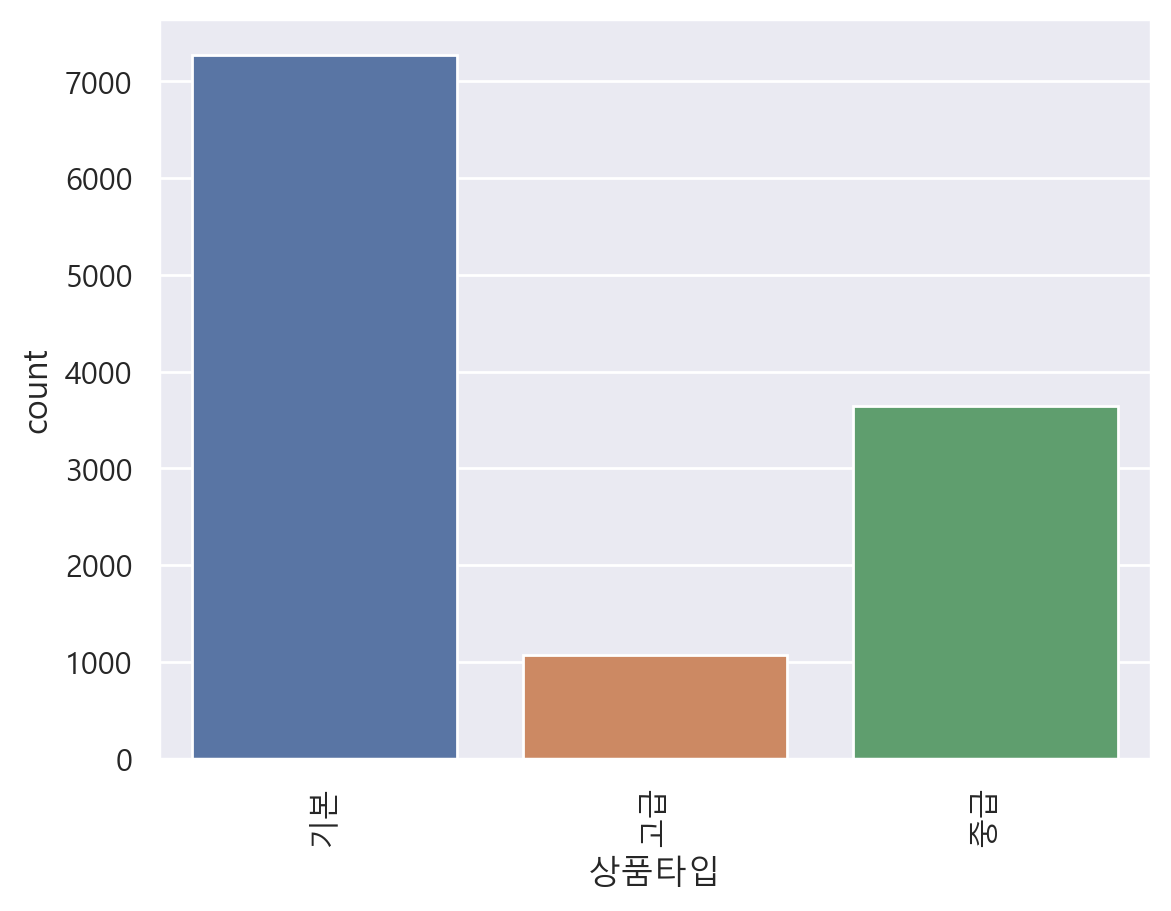

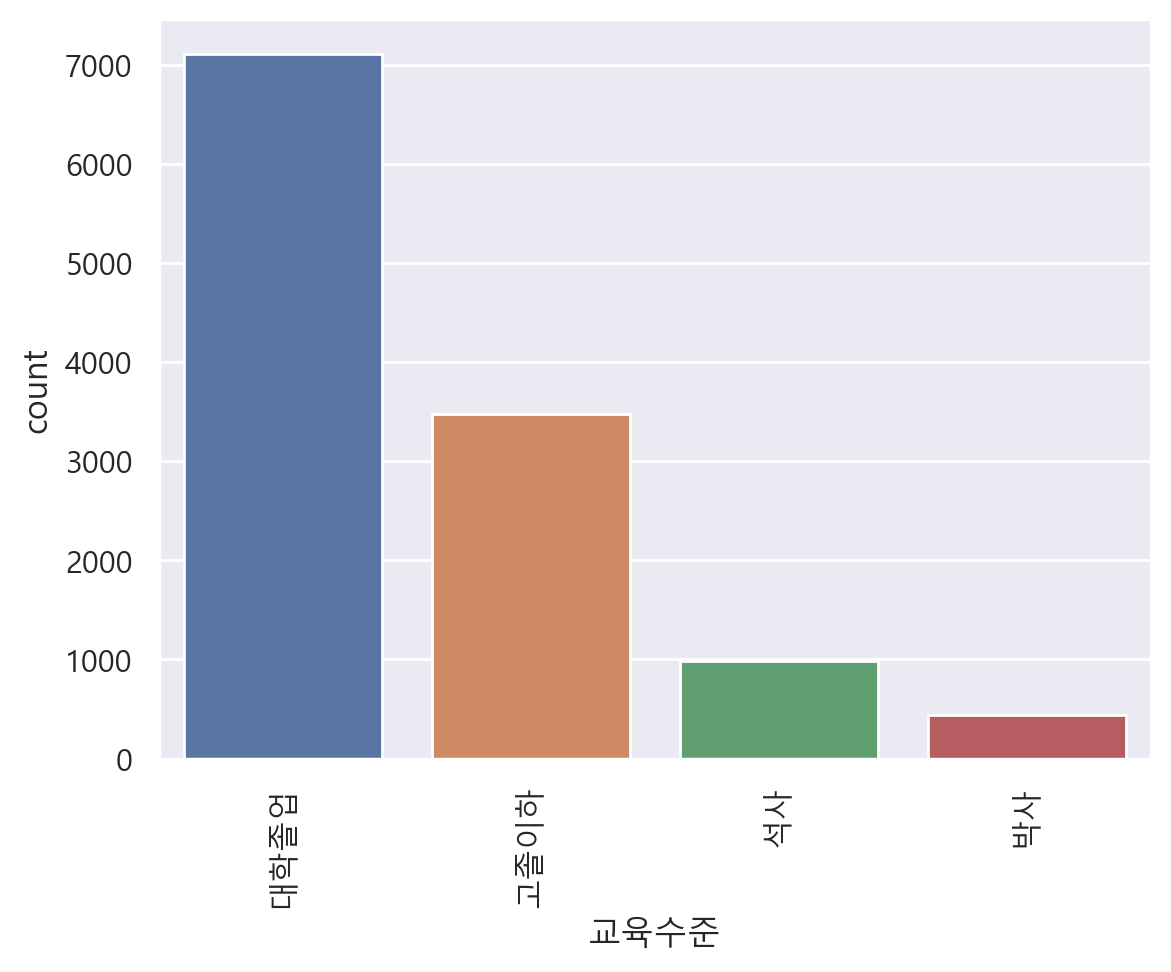

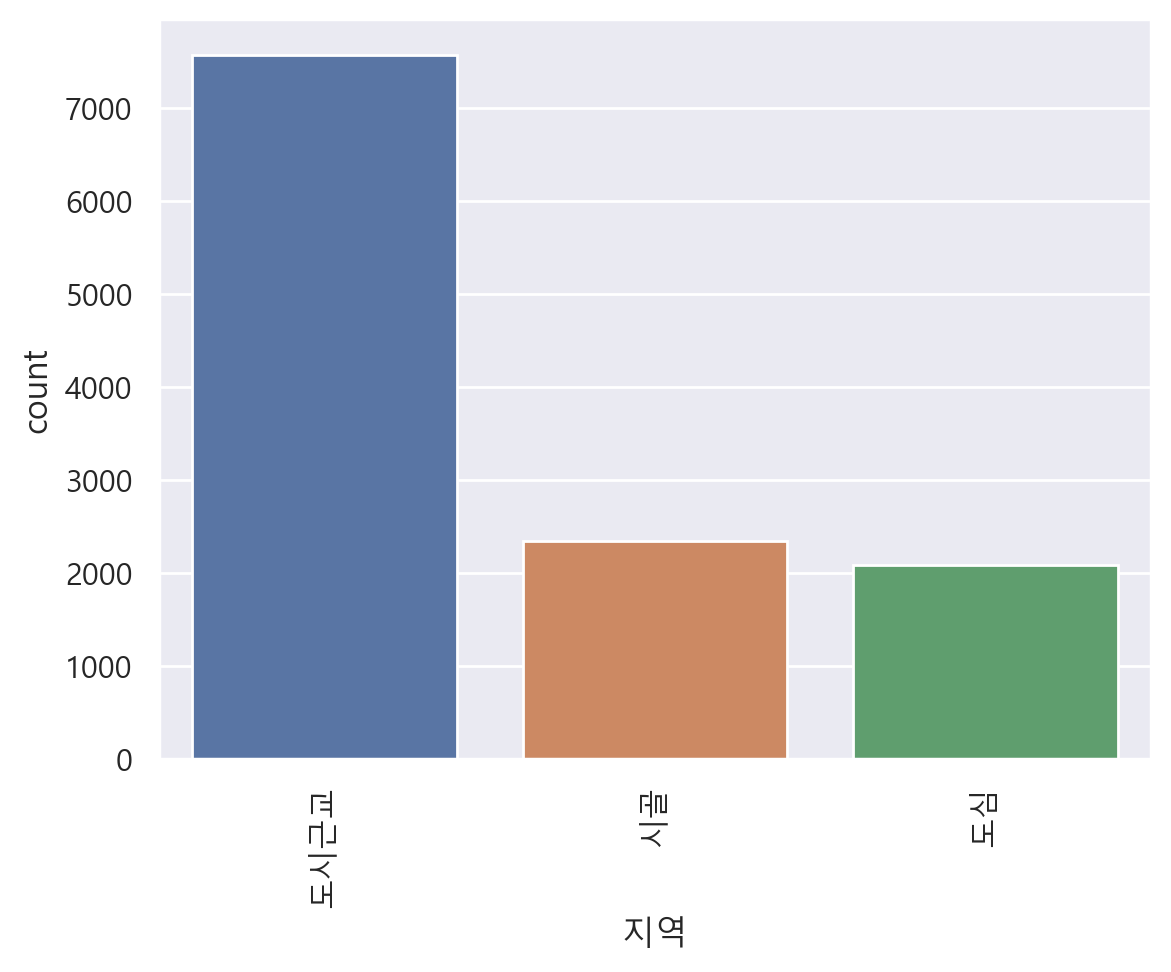

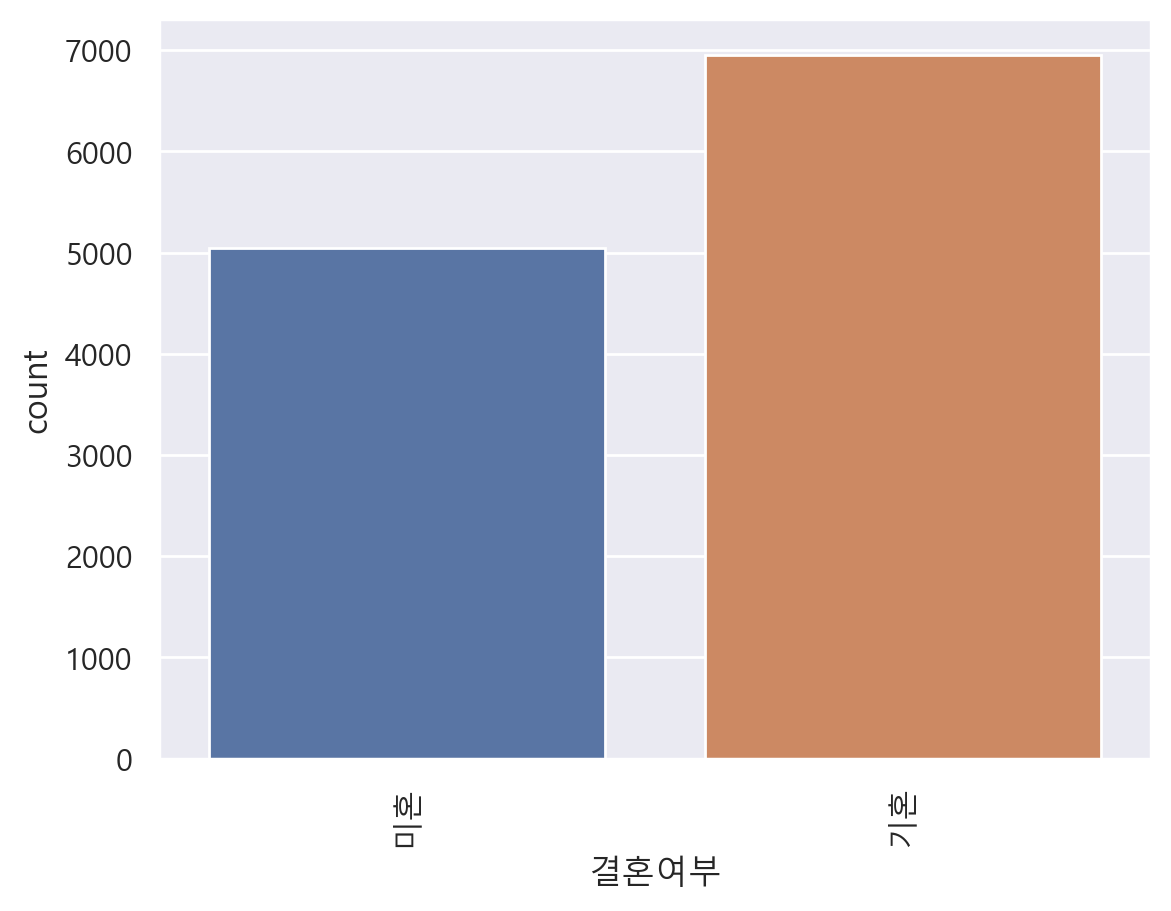

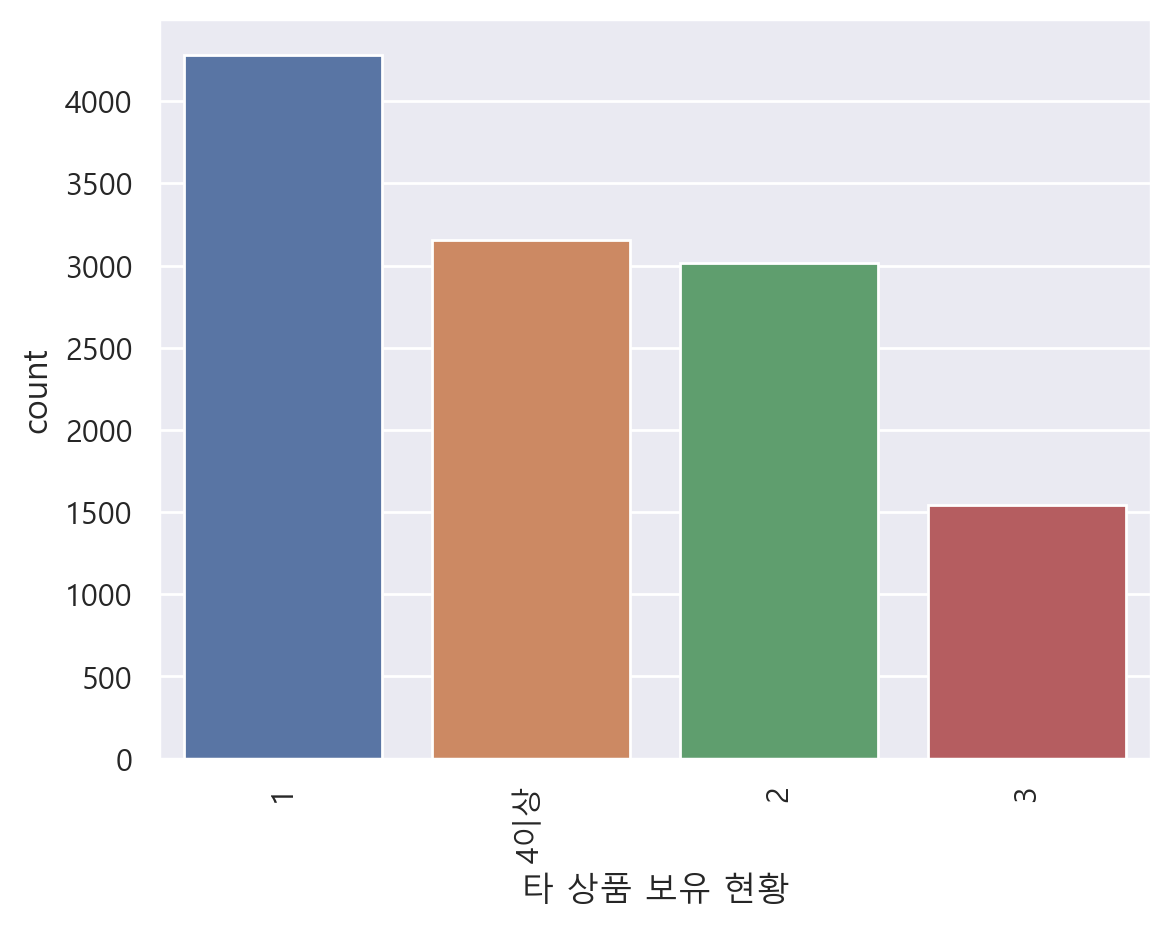

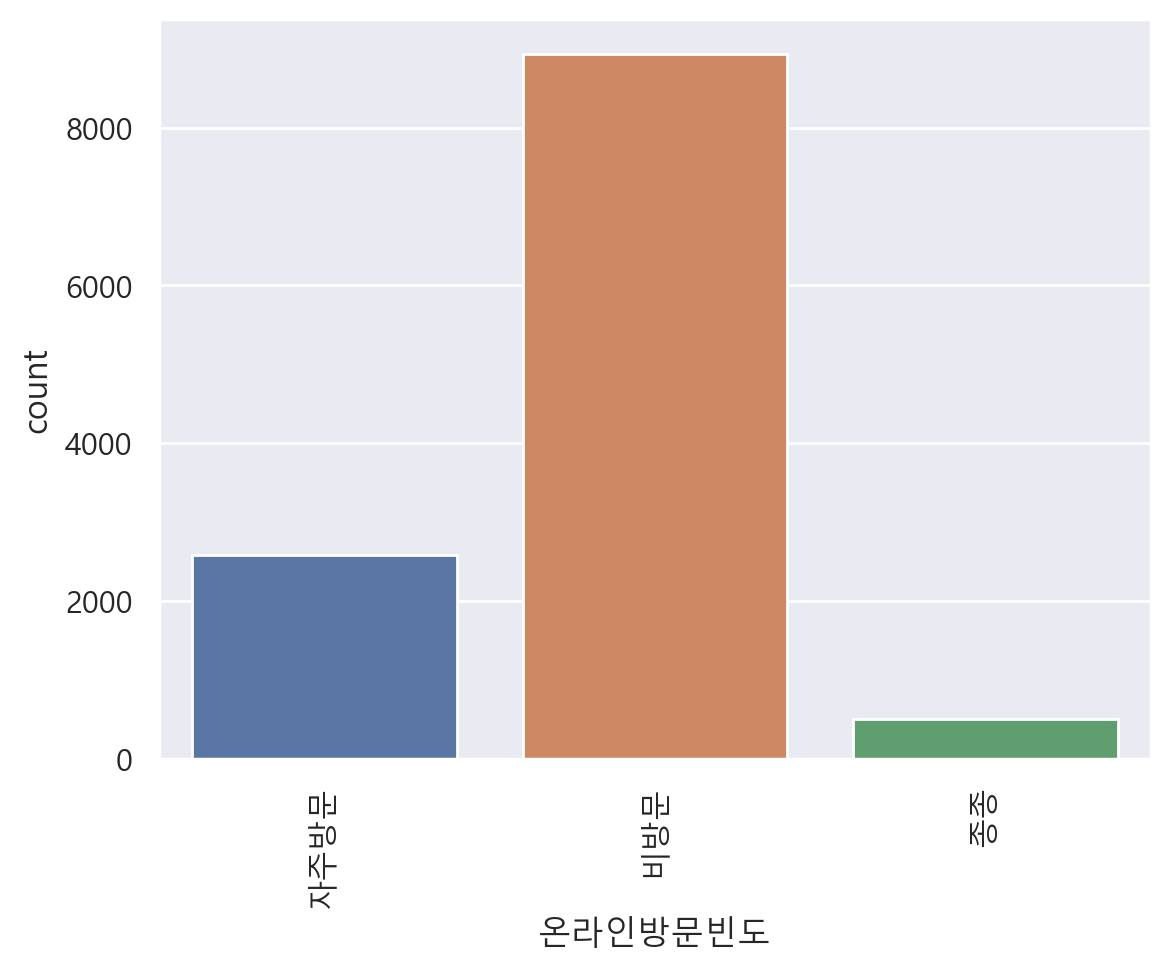

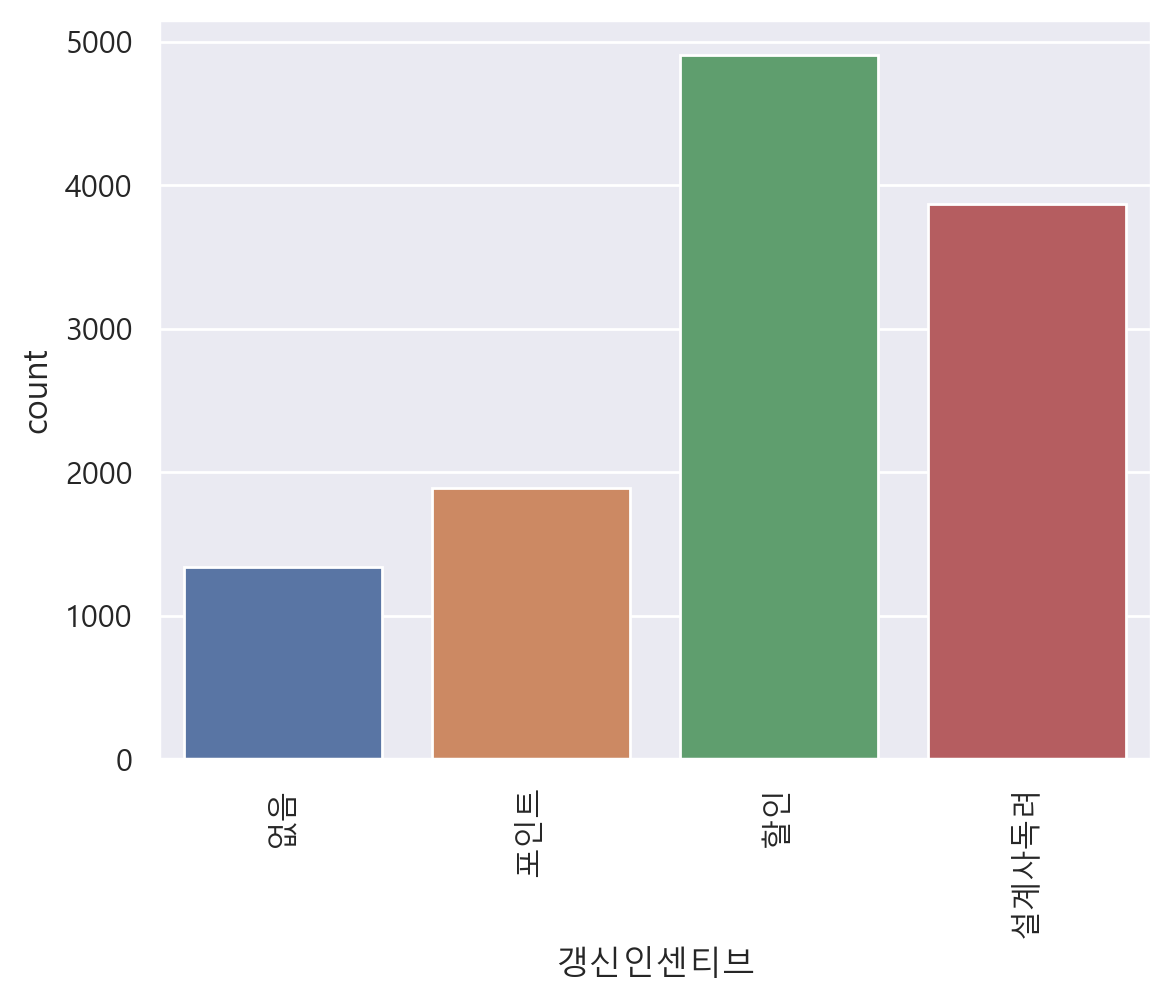

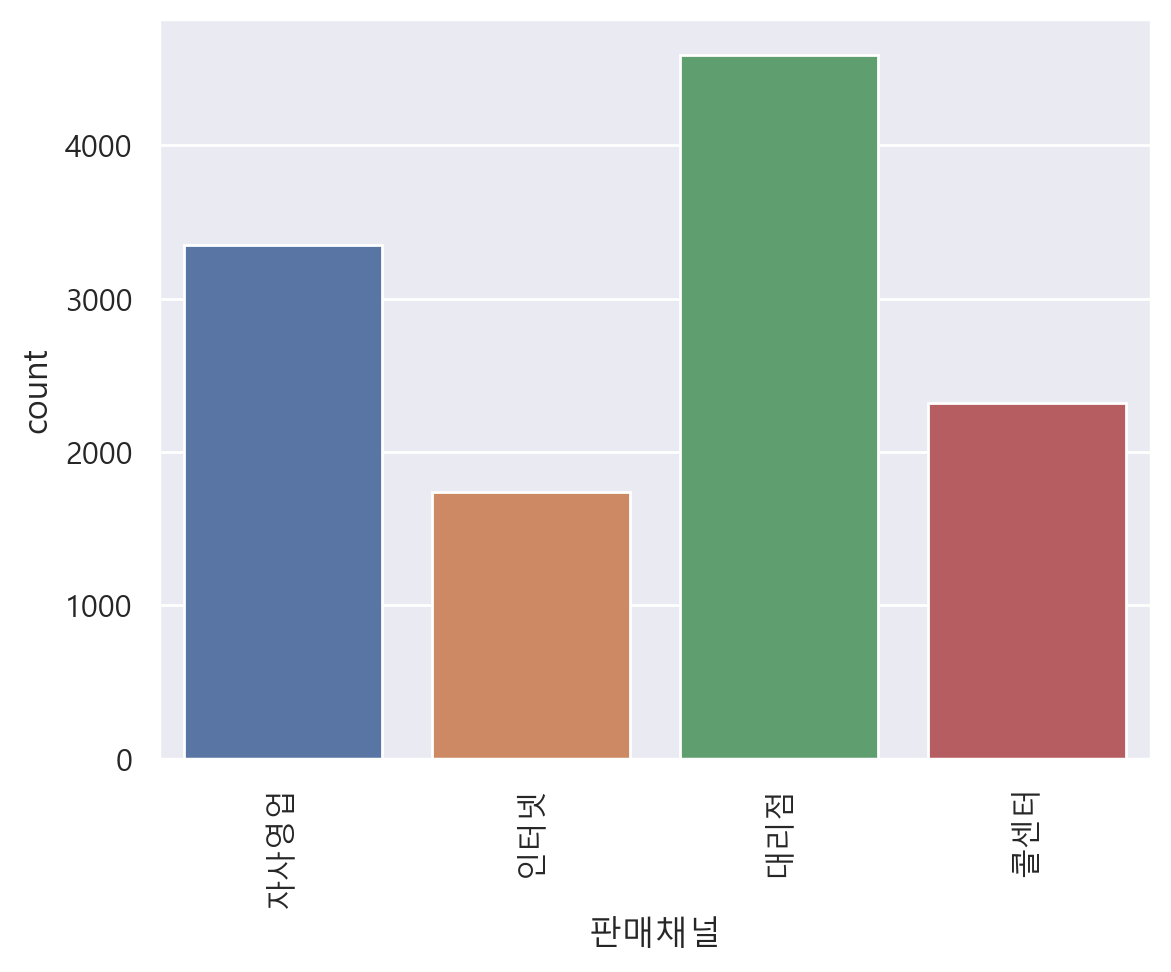

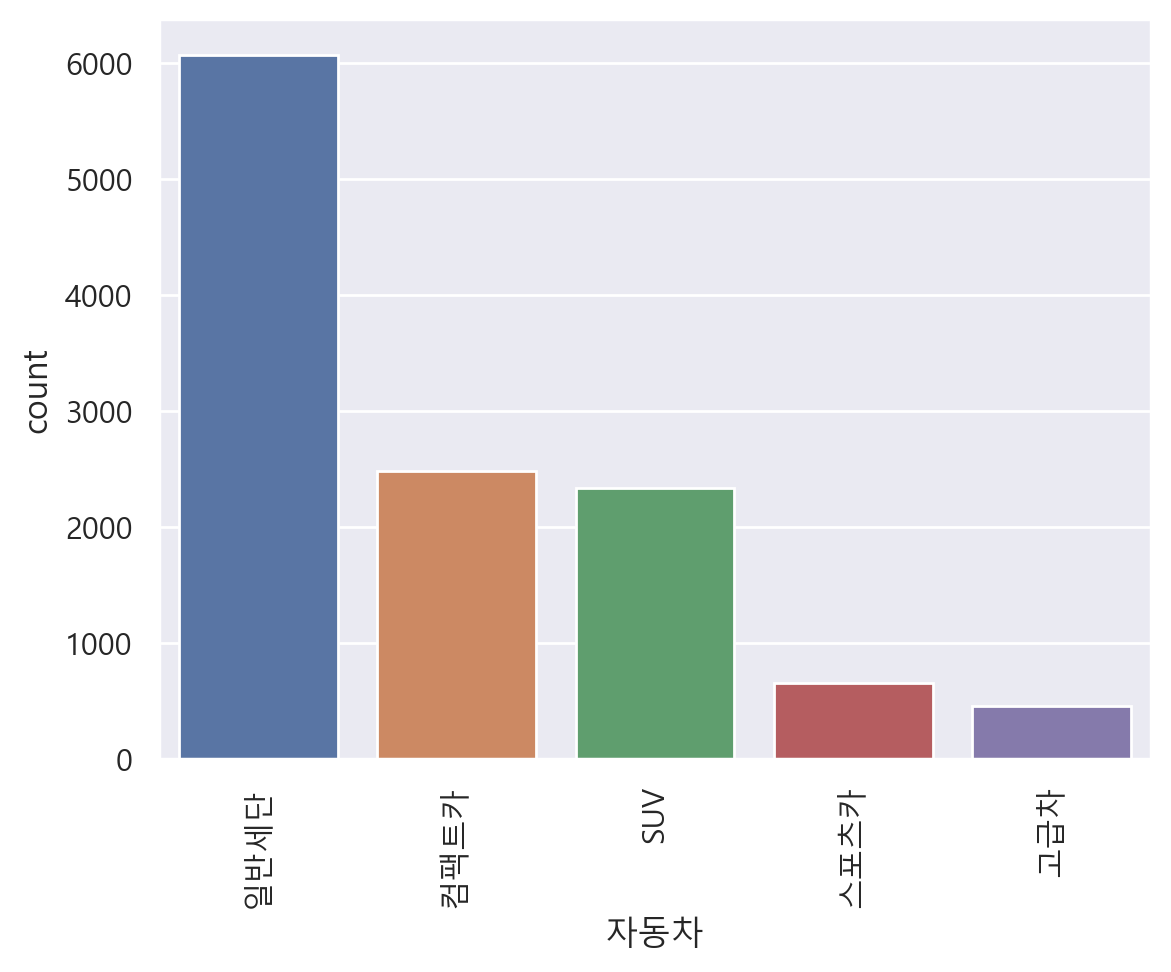

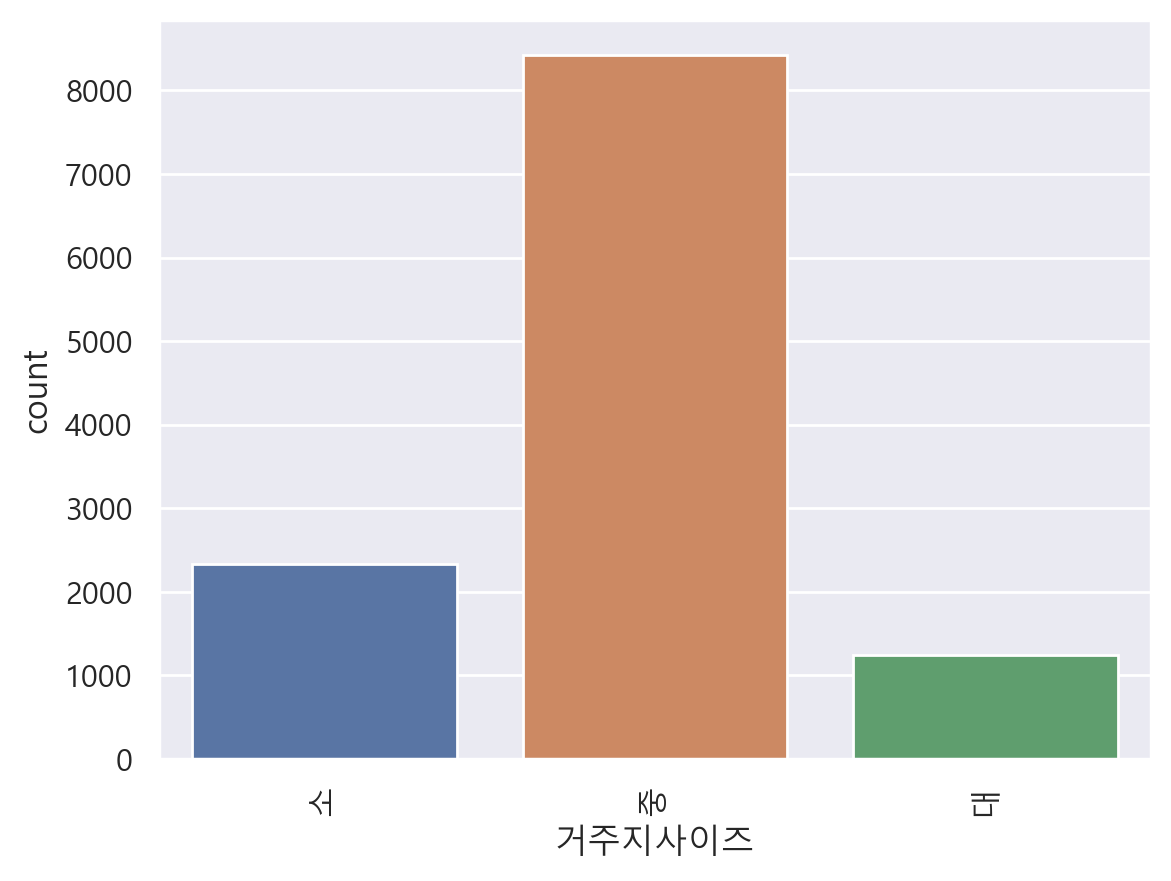

In [30]:
for c in df_object.columns:
    sns.countplot( c , data = df_object)
    plt.xticks( rotation = 90)
    plt.show()

## 2 X 2 시각화: 결혼여부와 등록 시각화

In [31]:
data = df_object
target = '등록(계/피)'
feature = '결혼여부'

In [32]:
pd.crosstab(data[target], data[feature])

결혼여부,기혼,미혼
등록(계/피),,
계약자,5478,3947
피보험자,1479,1096


In [33]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

결혼여부,기혼,미혼
등록(계/피),,
계약자,0.787408,0.782669
피보험자,0.212592,0.217331


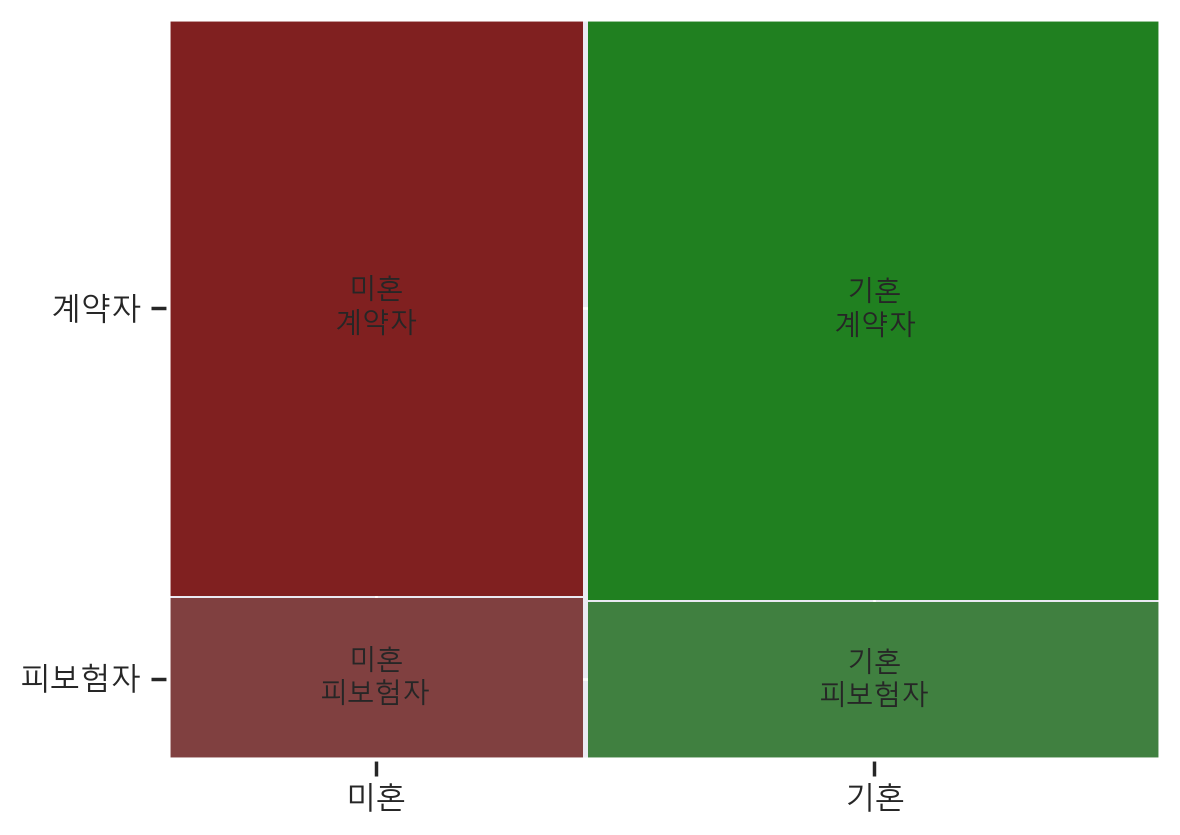

In [34]:
mosaic(data, [ feature,target])
# plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

In [35]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도',result[2])
print('기대빈도\n',result[3])

교차표
 결혼여부       기혼    미혼
등록(계/피)            
계약자      5478  3947
피보험자     1479  1096
----------------------------------------------------------------------------------------------------
카이제곱통계량 0.3620289105551139
p-value 0.5473815840980729
자유도 1
기대빈도
 [[5464.14375 3960.85625]
 [1492.85625 1082.14375]]


#### 통계적으로 유의한 차이가 없으며, 두 범주간의 독립성이 있다. 

# 3 X 3 시각화 : 온라인방문빈도 와 지역

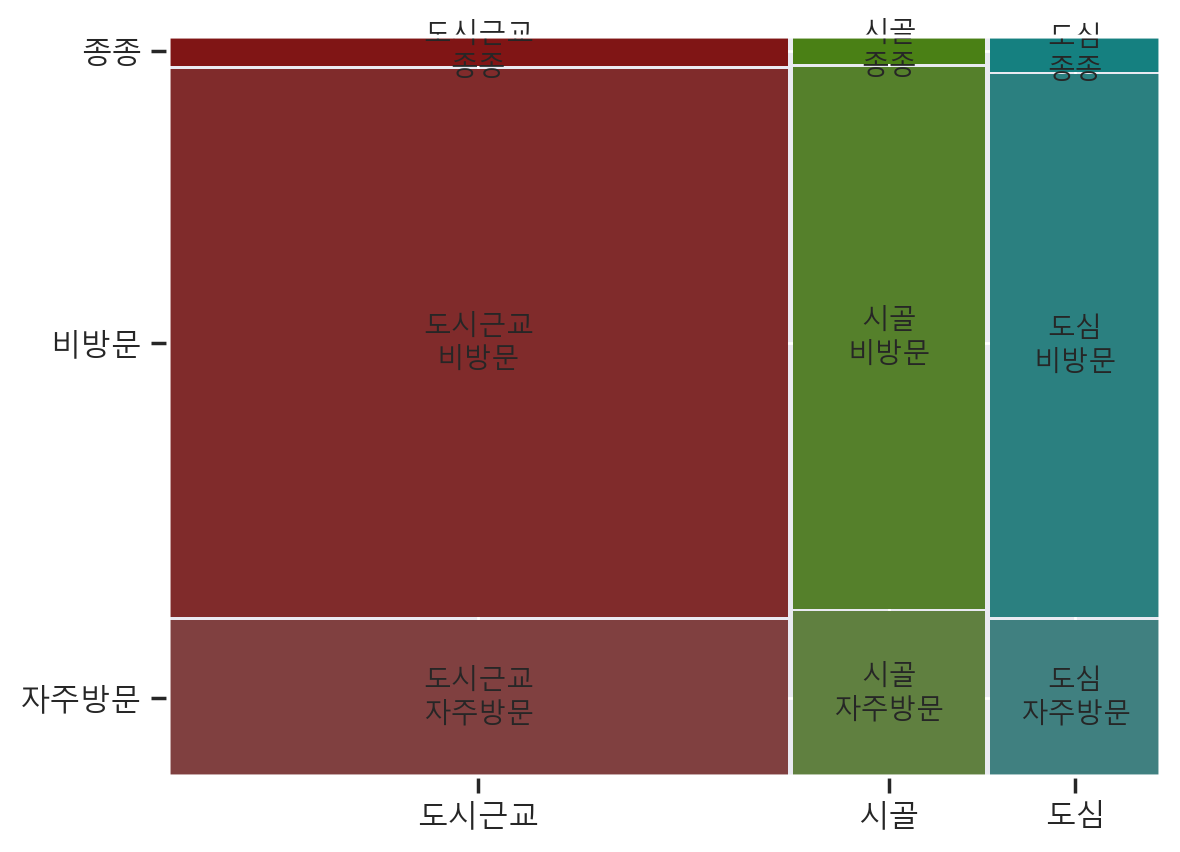

In [36]:
target = '온라인방문빈도'
feature = '지역'
mosaic(data, [ feature,target])
# plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

In [37]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도',result[2])
print('기대빈도\n',result[3])

교차표
 지역       도시근교    도심    시골
온라인방문빈도                  
비방문      5658  1540  1730
자주방문     1607   443   525
종종        307   101    89
----------------------------------------------------------------------------------------------------
카이제곱통계량 4.798113801132444
p-value 0.30864643219149135
자유도 4
기대빈도
 [[5633.568      1550.496      1743.936     ]
 [1624.825       447.19166667  502.98333333]
 [ 313.607        86.31233333   97.08066667]]


#### 통계적으로 유의한 차이가 없으며, 세 범주간의 독립성이 있다. 

# 모든 칼럼들 카이제곱 비교

In [38]:
features = data.columns

for i in range(len(features)):
    for j in range(i+1, len(features)):
        col1 = features[i]
        col2 = features[j]
        
        print(f"\n\n카이제곱 검정: {col1} vs {col2}")
        print('-' * 100)
        
        # 교차표 생성
        table = pd.crosstab(data[col1], data[col2])
        print('교차표\n', table)
        print('-' * 100)

        # 카이제곱검정
        result = spst.chi2_contingency(table)
        print('카이제곱통계량', result[0])
        print('p-value', result[1])
        print('자유도', result[2])
        print('기대빈도\n', result[3])
        print('-' * 100)



카이제곱 검정: 등록(계/피) vs 고용상태
----------------------------------------------------------------------------------------------------
교차표
 고용상태     FALSE    고용    무직   휴직
등록(계/피)                        
계약자        291  5887  2379  868
피보험자        69  1631   649  226
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.787555879630324
p-value 0.6176466528820812
자유도 3
기대빈도
 [[ 282.75       5904.7625     2378.24166667  859.24583333]
 [  77.25       1613.2375      649.75833333  234.75416667]]
----------------------------------------------------------------------------------------------------


카이제곱 검정: 등록(계/피) vs 상품타입
----------------------------------------------------------------------------------------------------
교차표
 상품타입      고급    기본    중급
등록(계/피)                 
계약자      841  5696  2888
피보험자     234  1582   759
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.300675463

# 통계적으로 유의한 칼럼들만 도출

In [39]:
# 칼럼 리스트
features = data.columns

significant_pairs = []  # 유의한 컬럼 쌍을 저장할 리스트

# 모든 칼럼 쌍에 대한 카이제곱 검정 수행
for i in range(len(features)):
    for j in range(i+1, len(features)):
        col1 = features[i]
        col2 = features[j]
        
        # 교차표 생성
        table = pd.crosstab(data[col1], data[col2])

        # 카이제곱검정
        result = spst.chi2_contingency(table)

        # 카이제곱통계량이 자유도의 2배 이상인 경우
        if result[0] > result[2] * 2:
            significant_pairs.append((col1, col2))

# 유의한 컬럼 쌍 출력
print("카이제곱 통계량이 자유도의 2배 이상인 컬럼 쌍:")
for pair in significant_pairs:
    print(pair)

카이제곱 통계량이 자유도의 2배 이상인 컬럼 쌍:
('등록(계/피)', '온라인방문빈도')
('등록(계/피)', '갱신인센티브')
('고용상태', '상품타입')
('고용상태', '교육수준')
('고용상태', '지역')
('고용상태', '결혼여부')
('고용상태', '타 상품 보유 현황')
('고용상태', '갱신인센티브')
('고용상태', '판매채널')
('고용상태', '거주지사이즈')
('상품타입', '교육수준')
('상품타입', '지역')
('상품타입', '타 상품 보유 현황')
('상품타입', '갱신인센티브')
('상품타입', '판매채널')
('상품타입', '자동차')
('교육수준', '지역')
('교육수준', '결혼여부')
('교육수준', '타 상품 보유 현황')
('교육수준', '갱신인센티브')
('교육수준', '자동차')
('교육수준', '거주지사이즈')
('지역', '결혼여부')
('지역', '갱신인센티브')
('지역', '자동차')
('지역', '거주지사이즈')
('결혼여부', '타 상품 보유 현황')
('결혼여부', '갱신인센티브')
('결혼여부', '판매채널')
('결혼여부', '자동차')
('결혼여부', '거주지사이즈')
('타 상품 보유 현황', '갱신인센티브')
('타 상품 보유 현황', '자동차')
('타 상품 보유 현황', '거주지사이즈')
('갱신인센티브', '판매채널')
('갱신인센티브', '자동차')
('판매채널', '자동차')
('자동차', '거주지사이즈')
